# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Add path to local project source code
import sys
sys.path.append('../src')

from utils import inspect_datasets

# Explore

## Taraslia et al, 2013

### Environment setup

In [2]:
TARASLIA_ALL_PATH = '../data/taraslia/all.xls'
TARASLIA_OLFACTORY_BULB_PATH = '../data/taraslia/olfactory_bulb.xls'
TARASLIA_HIPPOCAMPUS_PATH = '../data/taraslia/hippocampus.xls'
TARASLIA_MIDBRAIN_PATH = '../data/taraslia/midbrain.xls'
TARASLIA_MEDULLA_PATH = '../data/taraslia/medulla.xls'
TARASLIA_CEREBELLUM_PATH = '../data/taraslia/cerebellum.xls'
TARASLIA_HYPPOTHALAMUS_PATH = '../data/taraslia/hypothalamus.xls'
TARASLIA_CORTEX_PATH = '../data/taraslia/cortex.xls'

taraslia_file_paths = [
    TARASLIA_ALL_PATH, TARASLIA_OLFACTORY_BULB_PATH, TARASLIA_HIPPOCAMPUS_PATH, TARASLIA_MIDBRAIN_PATH,
    TARASLIA_MEDULLA_PATH, TARASLIA_CEREBELLUM_PATH, TARASLIA_HYPPOTHALAMUS_PATH, TARASLIA_CORTEX_PATH
]

In [3]:
tar_df_all = pd.read_excel(TARASLIA_ALL_PATH, header=1) # all brain regions
tar_df_ob = pd.read_excel(TARASLIA_OLFACTORY_BULB_PATH, header=1)
tar_df_hc = pd.read_excel(TARASLIA_HIPPOCAMPUS_PATH, header=1)
tar_df_mb = pd.read_excel(TARASLIA_MIDBRAIN_PATH, header=1)
tar_df_md = pd.read_excel(TARASLIA_MEDULLA_PATH, header=1)
tar_df_cb = pd.read_excel(TARASLIA_CEREBELLUM_PATH, header=1)
tar_df_ht = pd.read_excel(TARASLIA_HYPPOTHALAMUS_PATH, header=1)
tar_df_cc = pd.read_excel(TARASLIA_CORTEX_PATH, header=1)

taraslia_dfs_dict = {
    "All Brain Regions": tar_df_all,
    "Olfactory Bulb": tar_df_ob,
    "Hippocampus": tar_df_hc,
    "Midbrain": tar_df_mb,
    "Medulla": tar_df_md,
    "Cerebellum": tar_df_cb,
    "Hypothalamus": tar_df_ht,
    "Cerebral Cortex": tar_df_cc
}

### Inspect data

In [4]:
for path in taraslia_file_paths:
    # header=None prevents pandas from setting the first row as column headers
    df_info = pd.read_excel(path, nrows=1, header=None)
    
    # Extract the table title from the first cell
    table_title = df_info.iloc[0, 0]
    
    # Get the file name from the path
    file_name = path.split('/')[-1]
    
    print(f"{file_name}: {table_title}")

all.xls: Table I. Proteins identified in the nornal mouse brain parts.
olfactory_bulb.xls: Table II. Proteins identified only in olfactory bulb
hippocampus.xls: Table III. Proteins identified only in hippocampus 
midbrain.xls: Table IV. Proteins identified only in midbrain 
medulla.xls: Table V. Proteins identified only in medulla 
cerebellum.xls: Table VI. Proteins identified only in cerebellum 
hypothalamus.xls: Table VII. Proteins identified only in hypothalamus 
cortex.xls: Table VIII. Proteins identified only in cortex


The xls files contain a descriptive title in the first row. Here we extract the metadata and confirm what biological data each file contains before loading the full datasets.

In [5]:
inspect_datasets(taraslia_dfs_dict)


==================== All Brain Regions ====================
Shape: 515 rows × 7 columns


,Accession Name,Protein name,Protein MW,pI-Value,Brain part,Subcellular localisation,Function
0,1433B_MOUSE,14-3-3 protein beta/alpha,28183,4.62,"OB, HT, MD",Cytoplasm,"Transcription rergulation, cytoplasmic sequest..."
1,1433E_MOUSE,14-3-3 protein epsilon,29326,4.50,"OB, MB, HT, HC, CB, MD",Cytoplasm,"Cerebral cortex development, hippocampus devel..."
2,1433F_MOUSE,14-3-3 protein eta,28365,4.66,OB,Cytoplasm,"Glucocorticoid catabolism, glucocorticoid rece..."



Missing values per column:


,Missing Count,Missing %
Subcellular localisation,19,3.69


Duplicate rows: 0
------------------------------------------------------------

==================== Olfactory Bulb ====================
Shape: 54 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,1433F_MOUSE,14-3-3 protein eta,64,40,28365,4.66
1,3HIDH_MOUSE,"3-hydroxyisobutyrate dehydrogenase, mitochondr...",112,40,35816,9.30
2,ACTBL_MOUSE,Beta-actin-like protein 2,58,22,42319,5.19


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Hippocampus ====================
Shape: 62 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,AHSA1_MOUSE,Activator of 90 kDa heat shock protein ATPase ...,117,47,38321,5.3
1,AIP_MOUSE,AH receptor-interacting protein,65,25,38037,6.0
2,AMRP_MOUSE,Alpha-2-macroglobulin receptor-associated protein,135,38,42189,7.9


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Midbrain ====================
Shape: 9 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,6PGL_MOUSE,6-phosphogluconolactonase,69,43,27465,5.5
1,AT1A3_MOUSE,Sodium/potassium-transporting ATPase subunit a...,76,13,113045,5.1
2,CX4NB_MOUSE,Neighbor of COX4,56,30,23790,5.7


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Medulla ====================
Shape: 10 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,AATM_MOUSE,"Aspartate aminotransferase, mitochondrial",96,26,47780,9.80
1,CNN1_MOUSE,Calponin-1,55,33,33506,9.60
2,DDX3L_MOUSE,Putative ATP-dependent RNA helicase Pl10,81,25,73494,6.82


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Cerebellum ====================
Shape: 5 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,4EBP2_MOUSE,Eukaryotic translation initiation factor 4E-bi...,55,80,13004,6.10
1,CB070_MOUSE,UPF0573 protein C2orf70 homolog,57,43,23113,10.06
2,CYC_MOUSE,"Cytochrome c, somatic",55,39,11712,10.19


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Hypothalamus ====================
Shape: 8 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,FBX16_MOUSE,F-box only protein 16,55,35,39362,10.64
1,K1C15_MOUSE,"Keratin, type I cytoskeletal 15",56,25,49278,4.60
2,LAP2B_MOUSE,"Lamina-associated polypeptide 2, isoforms beta...",60,27,50378,9.90


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Cerebral Cortex ====================
Shape: 36 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,ABD12_MOUSE,Monoacylglycerol lipase ABHD12,87,32,45640,9.60
1,AL9A1_MOUSE,4-trimethylaminobutyraldehyde dehydrogenase,82,31,54449,6.77
2,ARK72_MOUSE,Aflatoxin B1 aldehyde reductase member 2,124,48,41028,9.30


No missing values found.
Duplicate rows: 0
------------------------------------------------------------


The **Subcellular localisation** column is descriptive for protein function and does not seem to contain any identifiers. Therefore, these missing values will not interfere with the correlation analysis between brain regions.

- **Table I:** This dataset serves as the primary source for identifying **common proteins**. The `Brain part` column contains comma-separated values (e.g., `OB, HT, MD`), which indicates that a single protein was identified across multiple regions. It also provides biological metadata like function and subcellular localisation.
- **Tables II–VIII:** These datasets are **subsets** of Table I. They contain proteins identified exclusively in one specific brain region. Unlike Table I, these tables provide technical quality metrics (`Mascot score` and `Coverage %`).

For the comparison with previous studies, we will cross-reference the `Accession Name` (e.g., `1433B_MOUSE`) from the current tables against the proteins identified in previous studies mentioned in the literature.

In [6]:
region_name_to_abbreviation = {
    "Olfactory Bulb": "OB",
    "Hippocampus": "HC",
    "Midbrain": "MB",
    "Medulla": "MD",
    "Cerebellum": "CB",
    "Hypothalamus": "HT",
    "Cerebral Cortex": "CC"
}

# Collect data for the plot
graph_regions = []
graph_counts_file = []
graph_counts_master = []

for title, df_region in taraslia_dfs_dict.items():
    # Skip table I
    if title == "All Brain Regions (Table I)":
        continue
        
    # Get the code (e.g., 'OB')
    code = region_name_to_abbreviation.get(title)
    
    if code:
        # Filter Table I:
        # We look for rows where 'Brain part' is EXACTLY the region code.
        # This confirms the protein is unique to that region (not shared).
        # .str.strip() removes any accidental spaces in the excel data
        master_subset = tar_df_all[tar_df_all['Brain part'].astype(str).str.strip() == code]
        
        count_master = len(master_subset)
        count_file = len(df_region)
        
        # Check if they match
        status = "✅ OK" if count_master == count_file else "❌ MISMATCH"

        print(f"   Count in {title}: {count_file}")
        print(f"   Count in Table I: {count_master} (filtered for '{code}' only)")
        print(f"   Status: {status}")
        print("\n")

        graph_regions.append(title)
        graph_counts_file.append(count_file)
        graph_counts_master.append(count_master)

   Count in Olfactory Bulb: 54
   Count in Table I: 52 (filtered for 'OB' only)
   Status: ❌ MISMATCH


   Count in Hippocampus: 62
   Count in Table I: 63 (filtered for 'HC' only)
   Status: ❌ MISMATCH


   Count in Midbrain: 9
   Count in Table I: 8 (filtered for 'MB' only)
   Status: ❌ MISMATCH


   Count in Medulla: 10
   Count in Table I: 10 (filtered for 'MD' only)
   Status: ✅ OK


   Count in Cerebellum: 5
   Count in Table I: 5 (filtered for 'CB' only)
   Status: ✅ OK


   Count in Hypothalamus: 8
   Count in Table I: 8 (filtered for 'HT' only)
   Status: ✅ OK


   Count in Cerebral Cortex: 36
   Count in Table I: 35 (filtered for 'CC' only)
   Status: ❌ MISMATCH




A programmatic cross-verification was performed to compare the 'unique' proteins listed in the region-specific files (Tables II–VIII) against the 'all' dataset (Table I). While the datasets are largely consistent, minor discrepancies were observed, likely due to formatting artifacts (e.g., hidden whitespace in Excel cells) or minor labeling inconsistencies in the aggregate file.

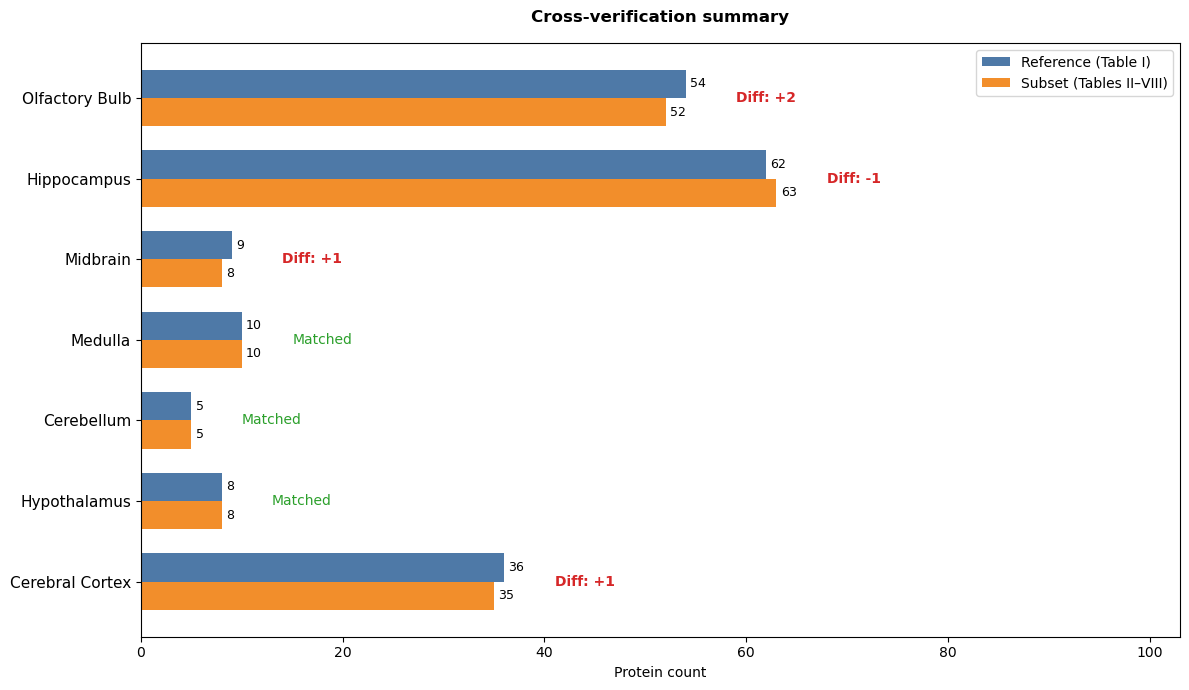

In [35]:
fig, ax = plt.subplots(figsize=(12, 7))

y = np.arange(len(graph_regions))
height = 0.35

# Invert y so the first region is at the top
y_pos = np.flip(y)

# Create horizontal bars
rects1 = ax.barh(y_pos + height/2, graph_counts_file, height, label='Reference (Table I)', color='#4e79a7')
rects2 = ax.barh(y_pos - height/2, graph_counts_master, height, label='Subset (Tables II–VIII)', color='#f28e2b')

# Formatting
ax.set_xlabel('Protein count')
ax.set_title('Cross-verification summary', fontweight='bold', pad=15)
ax.set_yticks(y_pos)
ax.set_yticklabels(graph_regions, fontsize=11)
ax.legend()

# Add numbers to bars
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0), textcoords="offset points",
                    ha='left', va='center', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Add Status Annotations on the right
for i, (f_c, m_c) in enumerate(zip(graph_counts_file, graph_counts_master)):
    diff = f_c - m_c
    if diff != 0:
        ax.text(max(f_c, m_c) + 5, y_pos[i], f"Diff: {diff:+d}", va='center', color="#d62728", fontweight='bold')
    else:
        ax.text(max(f_c, m_c) + 5, y_pos[i], "Matched", va='center', color="#2ca02c")

# Adjust limits
ax.set_xlim(0, max(max(graph_counts_file), max(graph_counts_master)) + 40)

plt.tight_layout()
plt.show()

### Correlation (Table II - VIII)

In [8]:
# Create a dictionary of sets from the dataframes
# Note: we use 'Accession Name' as the unique identifier for each protein
protein_sets = {
    "OB": set(tar_df_ob['Accession Name']),
    "HC": set(tar_df_hc['Accession Name']),
    "MB": set(tar_df_mb['Accession Name']),
    "MD": set(tar_df_md['Accession Name']),
    "CB": set(tar_df_cb['Accession Name']),
    "HT": set(tar_df_ht['Accession Name']),
    "CC": set(tar_df_cc['Accession Name'])
}

regions = list(protein_sets.keys())
matrix = pd.DataFrame(index=regions, columns=regions)

In [9]:
for r1 in regions:
    for r2 in regions:
        # Set intersection (&) finds proteins present in BOTH sets
        common_count = len(protein_sets[r1] & protein_sets[r2])
        matrix.loc[r1, r2] = common_count

print("Intersection Matrix (number of shared proteins):")
display(matrix)
# Convert the matrix dtypes from 'object' to 'int'
matrix = matrix.astype(int)

Intersection Matrix (number of shared proteins):


,OB,HC,MB,MD,CB,HT,CC
OB,54,0,0,0,0,0,0
HC,0,62,0,0,0,0,0
MB,0,0,9,1,0,0,0
MD,0,0,1,10,0,0,0
CB,0,0,0,0,5,0,0
HT,0,0,0,0,0,8,0
CC,0,0,0,0,0,0,36


In [10]:
# Convert the Accession Name columns into sets
set_mb = set(tar_df_mb['Accession Name'])
set_md = set(tar_df_md['Accession Name'])

# Find the intersection (the common protein)
shared_accession = set_mb.intersection(set_md)

# Filter the original dataframe to see the protein details
# We use list(shared_accession)[0] to get the string value out of the set
shared_protein_info = tar_df_mb[tar_df_mb['Accession Name'].isin(shared_accession)]

print(f"The shared protein is: {shared_accession}")
display(shared_protein_info)

The shared protein is: {'SEP10_MOUSE'}


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
6,SEP10_MOUSE,Septin-10,78,52,53186,6.17


The Intersection Matrix confirms that **Tables II-VIII** represent highly specific proteomic signatures. The fact that the diagonal values match the file row counts (e.g., 54 unique proteins for OB) and the off-diagonal values are almost entirely zero indicates that these tables contain proteins identified exclusively in those regions.

**Unique (Different) Proteins per Region:** <br>
The analysis confirms significant regional specialization. The number of proteins identified exclusively in each region are:
* Hippocampus (HC): 62 
* Olfactory Bulb (OB): 54
* Cerebral Cortex (CC): 36
* Medulla (MD): 10
* Midbrain (MB): 9
* Hypothalamus (HT): 8
* Cerebellum (CB): 5

**Common (Shared) Proteins:** <br>
* **Regional Overlap:** There is nearly zero overlap between the specific lists (Tables II-VIII), with the only intersection being **1 protein shared between the Midbrain and Medulla**.
* **Overall Connectivity:** Broadly shared proteins are listed in Table I, where identifiers like `1433E_MOUSE` are found in almost all brain parts (OB, MB, HT, HC, CB, MD), representing the "core" proteome of the mouse brain.

In [11]:
# Define the mapping of abbreviations to full names
region_abbreviation_to_name = {
    "OB": "Olfactory Bulb",
    "HC": "Hippocampus",
    "MB": "Midbrain",
    "MD": "Medulla",
    "CB": "Cerebellum",
    "HT": "Hypothalamus",
    "CC": "Cerebral Cortex"
}

matrix.index = matrix.index.map(region_abbreviation_to_name)
matrix.columns = matrix.columns.map(region_abbreviation_to_name)

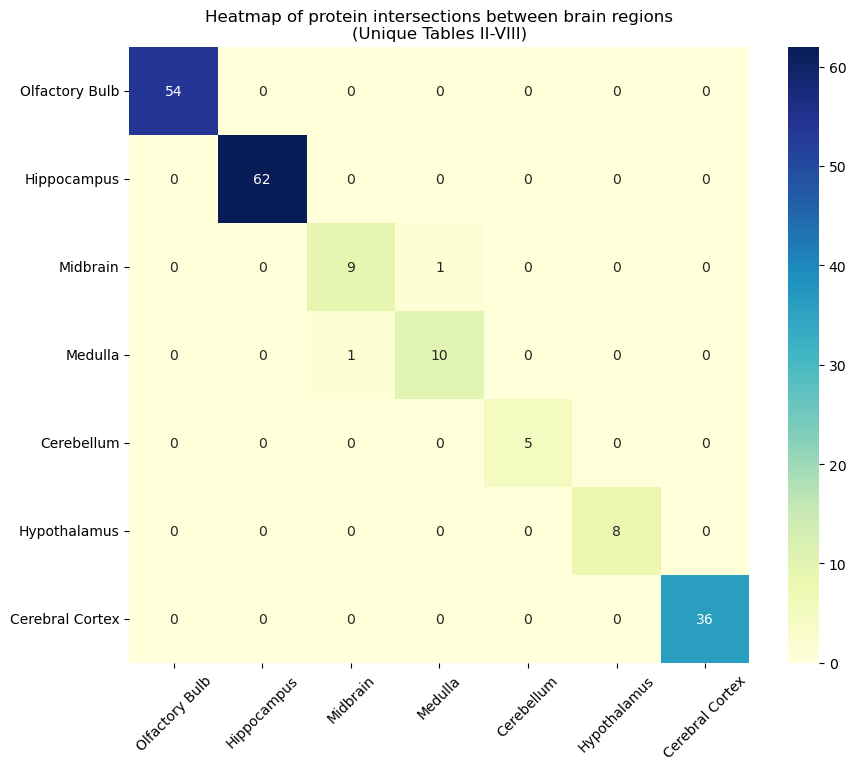

In [12]:
# Create a heatmap of the intersection matrix
plt.figure(figsize=(10, 8))
# annot=True puts the numbers in the boxes; cmap="YlGnBu" gives a nice blue/green look
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xticks(rotation=45)
plt.title("Heatmap of protein intersections between brain regions\n(Unique Tables II-VIII)")
plt.show()

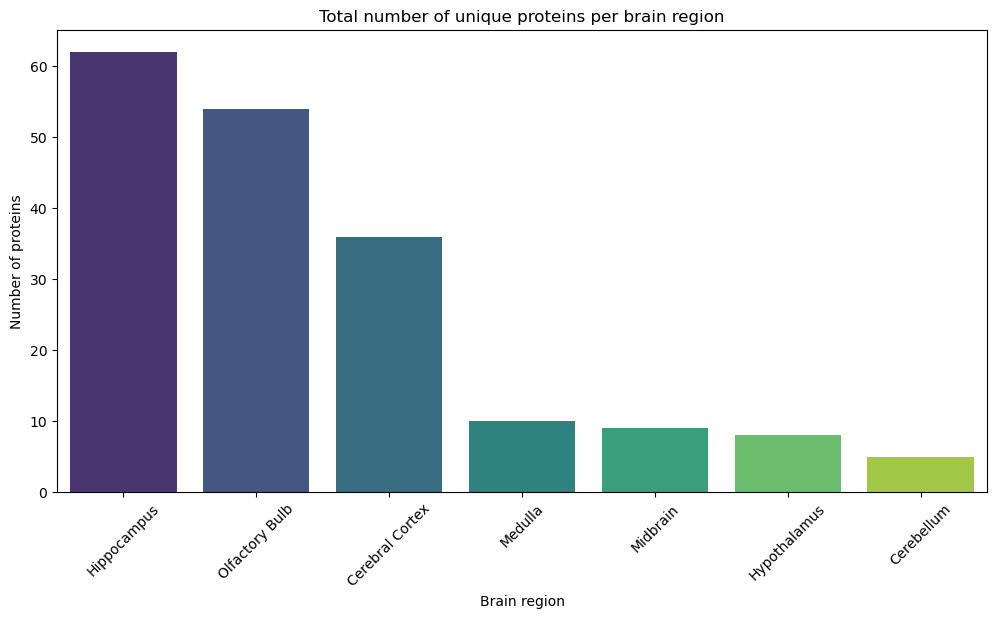

In [13]:
# Prepare the data
unique_counts = matrix.values.diagonal()
unique_series = pd.Series(unique_counts, index=matrix.index).sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(
    x=unique_series.index, 
    y=unique_series.values, 
    hue=unique_series.index, 
    palette="viridis", 
    legend=False
)

plt.title("Total number of unique proteins per brain region")
plt.ylabel("Number of proteins")
plt.xlabel("Brain region")
plt.xticks(rotation=45) # Rotate labels so they don't overlap
plt.show()

### Common (Table I)

To identify **common proteins**, we must refer to **Table I**, where the `Brain part` column explicitly lists multiple regional overlaps for shared proteins (e.g., `OB, MB, HT, HC, CB, MD`).

In [14]:
df_exploded = tar_df_all.copy()
# Split the string "OB, HT, MD" into a list ['OB', 'HT', 'MD']
df_exploded['Brain part'] = df_exploded['Brain part'].str.split(', ')
# Turn those lists into separate rows
df_exploded = df_exploded.explode('Brain part')

# Find common proteins - Count how many regions each protein appears in
protein_counts = tar_df_all['Brain part'].str.split(', ').str.len()

# Proteins common to ALL regions (7 regions in total)
common_to_all = tar_df_all[protein_counts == 7]

# Proteins common to MULTIPLE regions (more than 1)
common_proteins = tar_df_all[protein_counts > 1]

n_total_proteins = len(tar_df_all)
n_common_all_regions = len(common_to_all)
n_common_multiple_regions = len(common_proteins)

print(f"Total proteins identified: {n_total_proteins}")
# Using :.1% for one decimal place
print(f"Proteins common to all 7 regions: {n_common_all_regions} ({n_common_all_regions/n_total_proteins:.1%})")
print(f"Proteins common to multiple regions: {n_common_multiple_regions} ({n_common_multiple_regions/n_total_proteins:.1%})")

display(common_to_all[['Accession Name', 'Protein name', 'Brain part']].head(3))

Total proteins identified: 515
Proteins common to all 7 regions: 41 (8.0%)
Proteins common to multiple regions: 334 (64.9%)


,Accession Name,Protein name,Brain part
3,1433G_MOUSE,14-3-3 protein gamma,"OB, CC, MB, HT, HC, CB, MD"
5,1433Z_MOUSE,14-3-3 protein zeta/delta,"ΟΒ, CC, MB, HT, HC, CB, MD"
13,ACON_MOUSE,"Aconitate hydratase, mitochondrial","OB, CC, MB, HT, HC, CB, MD"


Core Proteome (Universal): 41 proteins (8% of the total) are ubiquitous, appearing in every part of the mouse brain.

Shared Proteome (Common): 334 proteins (approx. 65%) are shared between at least two regions. These represent the functional overlaps between different brain parts.

Specific Proteome (Unique within Table I): By subtracting 334 from 515, we find that 181 proteins in Table I were identified in only one region.

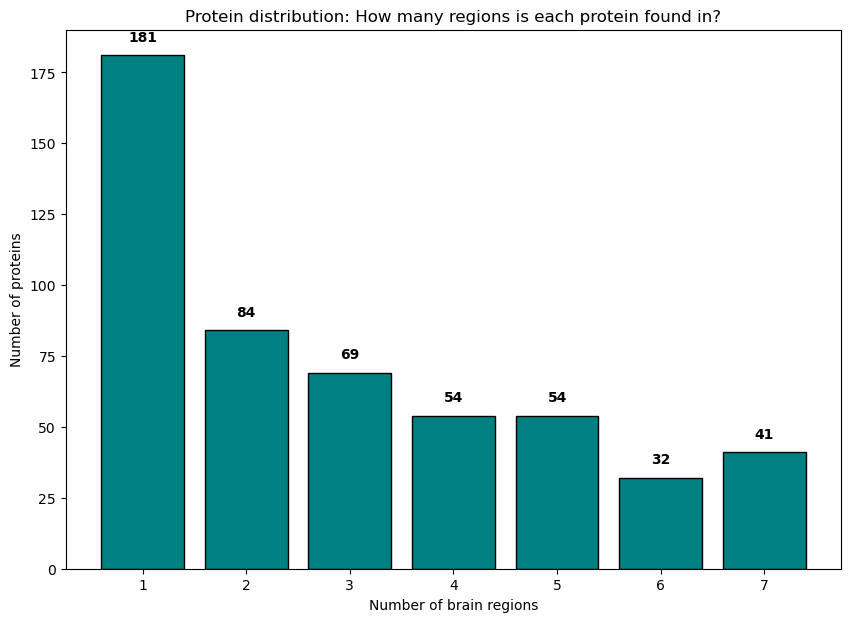

In [15]:
# Calculate the distribution of counts
# (How many proteins are in 1 region, 2 regions, etc.)
distribution = tar_df_all['Brain part'].str.split(', ').str.len().value_counts().sort_index()

plt.figure(figsize=(10, 7))
plt.bar(distribution.index, distribution.values, color='teal', edgecolor='black')

plt.title("Protein distribution: How many regions is each protein found in?")
plt.xlabel("Number of brain regions")
plt.ylabel("Number of proteins")

# Add text labels on top of bars
for i, v in enumerate(distribution.values):
    plt.text(distribution.index[i], v + 5, str(v), ha='center', fontweight='bold')

plt.show()

## Korovesi et al, 2020

### Environment setup

In [16]:
KOROVESI_OLFACTORY_BULB_PATH = '../data/korovesi/olfactory_balb.xlsx'
KOROVESI_HIPPOCAMPUS_PATH = '../data/korovesi/hipocampus.xlsx'
KOROVESI_MIDBRAIN_PATH = '../data/korovesi/midbrain.xlsx'
KOROVESI_MEDULLA_PATH = '../data/korovesi/medulla.xlsx'
KOROVESI_CEREBELLUM_PATH = '../data/korovesi/cerebellum.xlsx'
KOROVESI_HYPPOTHALAMUS_PATH = '../data/korovesi/hipothalamus.xlsx'
KOROVESI_CORTEX_PATH = '../data/korovesi/cortex.xlsx'

korovesi_file_paths = [
    KOROVESI_OLFACTORY_BULB_PATH, KOROVESI_HIPPOCAMPUS_PATH, KOROVESI_MIDBRAIN_PATH,
    KOROVESI_MEDULLA_PATH, KOROVESI_CEREBELLUM_PATH, KOROVESI_HYPPOTHALAMUS_PATH, KOROVESI_CORTEX_PATH
]

In [17]:
kor_df_ob = pd.read_excel(KOROVESI_OLFACTORY_BULB_PATH)
kor_df_hc = pd.read_excel(KOROVESI_HIPPOCAMPUS_PATH)
kor_df_mb = pd.read_excel(KOROVESI_MIDBRAIN_PATH)
kor_df_md = pd.read_excel(KOROVESI_MEDULLA_PATH)
kor_df_cb = pd.read_excel(KOROVESI_CEREBELLUM_PATH)
kor_df_ht = pd.read_excel(KOROVESI_HYPPOTHALAMUS_PATH)
kor_df_cc = pd.read_excel(KOROVESI_CORTEX_PATH)

korovesi_dfs_dict = {
    "Olfactory Bulb": kor_df_ob,
    "Hippocampus": kor_df_hc,
    "Midbrain": kor_df_mb,
    "Medulla": kor_df_md,
    "Cerebellum": kor_df_cb,
    "Hypothalamus": kor_df_ht,
    "Cerebral Cortex": kor_df_cc
}

### Inspect data

In [18]:
inspect_datasets(korovesi_dfs_dict)


==================== Olfactory Bulb ====================
Shape: 2311 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",167.199201,39.64,1,73,73,267,2.052619e+09,2472,284.422297,5.325684
1,P01942,Hemoglobin subunit alpha OS=Mus musculus GN=Hb...,97.368920,25.35,1,3,3,58,8.179751e+09,142,15.075761,8.221191
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,77.663826,32.87,2,17,24,165,7.478767e+09,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,192,8.31


Duplicate rows: 0
------------------------------------------------------------

==================== Hippocampus ====================
Shape: 2246 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",191.915079,42.31,2,81,81,227,2.265693e+09,2472,284.422297,5.325684
1,P60710,"Actin, cytoplasmic 1 OS=Mus musculus GN=Actb P...",88.966023,41.07,2,4,13,135,7.399753e+09,375,41.709732,5.478027
2,P63268,"Actin, gamma-enteric smooth muscle OS=Mus musc...",84.994816,29.52,4,2,10,92,4.758188e+09,376,41.849791,5.478027



Missing values per column:


,Missing Count,Missing %
Area,130,5.79


Duplicate rows: 0
------------------------------------------------------------

==================== Midbrain ====================
Shape: 2250 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,329.138484,30.40,10,12,24,114,1.806510e+09,1013,111.619932,5.414551
1,A3KGU5,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",297.171618,37.40,12,1,65,130,1.255898e+08,2457,282.720450,5.325684
2,A3KGU7,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",296.427158,37.02,14,1,65,130,1.255898e+08,2477,284.976676,5.338379



Missing values per column:


,Missing Count,Missing %
Area,178,7.91


Duplicate rows: 0
------------------------------------------------------------

==================== Medulla ====================
Shape: 2391 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",192.678235,42.76,1,87,88,245,2.256907e+09,2472,284.422297,5.325684
1,P08553,Neurofilament medium polypeptide OS=Mus muscul...,94.142858,38.44,1,28,28,168,2.633121e+09,848,95.858595,4.767090
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,66.442199,26.65,3,14,20,194,1.039373e+10,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,175,7.32


Duplicate rows: 0
------------------------------------------------------------

==================== Cerebellum ====================
Shape: 2334 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",656.608884,42.64,1,80,81,256,2.904653e+08,2472,284.422297,5.325684
1,Q04447,Creatine kinase B-type OS=Mus musculus GN=Ckb ...,299.488654,50.39,1,15,15,112,8.276152e+08,381,42.686280,5.668457
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,270.776774,28.83,3,13,21,106,1.501888e+09,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,193,8.27


Duplicate rows: 0
------------------------------------------------------------

==================== Hypothalamus ====================
Shape: 2247 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",155.247064,35.84,1,70,70,217,1.083412e+09,2472,284.422297,5.325684
1,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,154.370902,32.97,3,15,27,247,1.002156e+10,1013,111.619932,5.414551
2,Q6PIE5,Sodium/potassium-transporting ATPase subunit a...,98.597718,34.41,3,17,28,147,6.769849e+09,1020,112.145477,5.554199



Missing values per column:


,Missing Count,Missing %
Area,207,9.21


Duplicate rows: 0
------------------------------------------------------------

==================== Cerebral Cortex ====================
Shape: 2795 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",1033.115718,42.96,2,80,80,308,1.534083e+09,2472,284.422297,5.325684
1,Q60932,Voltage-dependent anion-selective channel prot...,500.948720,49.32,1,11,12,191,2.665349e+09,296,32.331378,8.426270
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,478.390221,28.53,2,13,21,151,6.228773e+09,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,338,12.09


Duplicate rows: 0
------------------------------------------------------------


In [19]:
KOROVESI_SUP_DAT_PATH = '../data/korovesi/supplementary_table.xlsx'
kor_df_sup = pd.read_excel(KOROVESI_CORTEX_PATH)
kor_df_sup.head(3)

,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",1033.115718,42.96,2,80,80,308,1.534083e+09,2472,284.422297,5.325684
1,Q60932,Voltage-dependent anion-selective channel prot...,500.948720,49.32,1,11,12,191,2.665349e+09,296,32.331378,8.426270
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,478.390221,28.53,2,13,21,151,6.228773e+09,1013,111.619932,5.414551


# Uniprot data

In [20]:
UNIPROT_PATH = '../data/uniprot_mouse_brain.tsv'

# Load the data - sep='\t' is essential for TSV files
df_uniprot = pd.read_csv(UNIPROT_PATH, sep='\t')

print(f"UniProt reference data loaded: {len(df_uniprot)} proteins")
df_uniprot.head(3)

UniProt reference data loaded: 8382 proteins


,Entry,Entry Name,Protein names,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function)
0,Q9WV92,E41L3_MOUSE,Band 4.1-like protein 3 (4.1B) (Differentially...,apoptotic process [GO:0006915]; axon developme...,cell-cell junction [GO:0005911]; cytoskeleton ...,actin binding [GO:0003779]; cytoskeletal prote...
1,Q99P72,RTN4_MOUSE,Reticulon-4 (Neurite outgrowth inhibitor) (Nog...,axonal fasciculation [GO:0007413]; blastocyst ...,anchoring junction [GO:0070161]; axon [GO:0030...,lipid binding [GO:0008289]; protein homodimeri...
2,B1AZP2,DLGP4_MOUSE,Disks large-associated protein 4 (DAP-4) (PSD-...,modification of postsynaptic structure [GO:009...,cholinergic synapse [GO:0098981]; glutamatergi...,NaN


In [21]:
# Entry Name is the "Accession Name" in the local data
protein_row = df_uniprot[df_uniprot["Entry Name"] == "1433B_MOUSE"]
display(protein_row)

,Entry,Entry Name,Protein names,Gene Ontology (biological process),Gene Ontology (cellular component),Gene Ontology (molecular function)
4847,Q9CQV8,1433B_MOUSE,14-3-3 protein beta/alpha (Protein kinase C in...,negative regulation of DNA-templated transcrip...,cytosol [GO:0005829]; melanosome [GO:0042470];...,histone deacetylase binding [GO:0042826]; iden...


## Standardization

A direct comparison between the two studies is impossible due to a mismatch in protein identifier formats:
- Taraslia (2013): Reported proteins using Uniprot current Entry Names (e.g., 1433B_MOUSE) in the column labeled 'Accession Name'.
- Korovesi (2020): Reported proteins using Uniprot Accession IDs (e.g., P61982) in the column labeled 'Accession'.

To enable data integration, we utilized the Uniprot reference database (df_uniprot) to map all Taraslia Entry Names to their stable Accession IDs. A unified column, UniprotID, was created in both datasets to serve as the universal primary key.

This standardization allowed us to successfully identify overlapping proteins and merge the datasets, revealing that the 2013 dataset is largely a subset of the more comprehensive 2020 dataset.

Mapping dictionary created with 8382 entries.


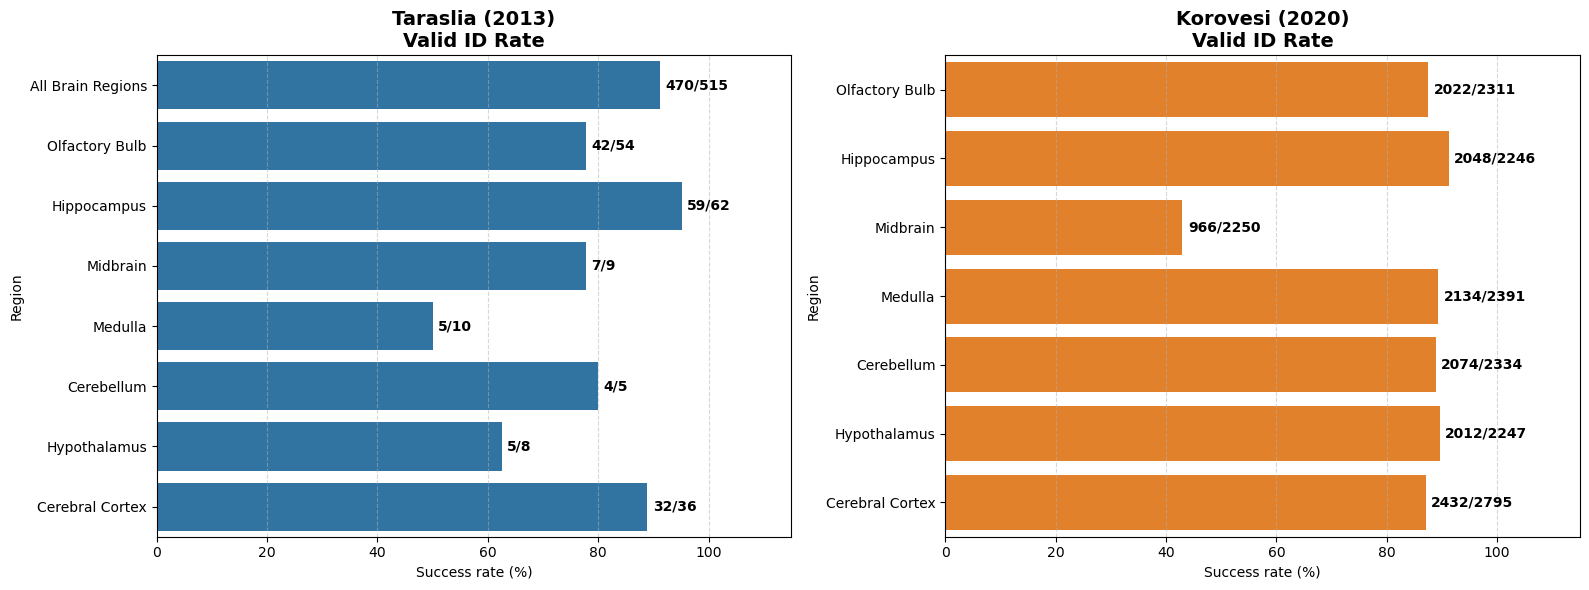

In [22]:
stats_data = []

# Create a Dictionary: { 'Entry Name': 'Entry', ... } or { '1433B_MOUSE': 'P61982', ... }
mapper = dict(zip(df_uniprot['Entry Name'], df_uniprot['Entry']))
valid_uniprot_entries = set(df_uniprot['Entry']) # For validation checking
id_validator = {x: x for x in valid_uniprot_entries}

print(f"Mapping dictionary created with {len(mapper)} entries.")

# Translate Taraslia IDs
# We create a NEW column 'UniprotID' in the Taraslia dataframes that matches Korovesi
for region, df in taraslia_dfs_dict.items():
    # Perform the Mapping
    df['UniprotID'] = df['Accession Name'].astype(str).str.strip().map(mapper)
    
    # Calculate stats
    total = len(df)
    mapped = df['UniprotID'].notna().sum() # Successful maps are not NaN
    
    stats_data.append({
        'Study': 'Taraslia (2013)',
        'Region': region,
        'Total': total,
        'Mapped': mapped,
        'Percentage': (mapped / total * 100) if total > 0 else 0
    })

# Translate Korovesi IDs (Just to be safe, standardizing column name)
for region, df in korovesi_dfs_dict.items():
    # Create uniprot id column after mapping the 'Accession' with the `Entry`
    df['UniprotID'] = df['Accession'].astype(str).str.strip().map(id_validator)

    # Use the below if we want to keep the 'Accession' as the single soure of truth
    # df['UniprotID'] = df['Accession'].astype(str).str.strip()
        
    # Calculate stats (Check if these IDs exist in uniprot data)
    total = len(df)
    valid_count = df['UniprotID'].isin(valid_uniprot_entries).sum()
    
    stats_data.append({
        'Study': 'Korovesi (2020)',
        'Region': region,
        'Total': total,
        'Mapped': valid_count,
        'Percentage': (valid_count / total * 100) if total > 0 else 0
    })

# Visualize the report
df_stats = pd.DataFrame(stats_data)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

def plot_stats(study_name, ax, color):
    subset = df_stats[df_stats['Study'] == study_name]
    sns.barplot(data=subset, x='Percentage', y='Region', ax=ax, color=color)
    
    ax.set_title(f"{study_name}\nValid ID Rate", fontsize=14, fontweight='bold')
    ax.set_xlabel("Success rate (%)")
    ax.set_xlim(0, 115)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Add labels: "42/50"
    for i, (idx, row) in enumerate(subset.iterrows()):
        label = f"{int(row['Mapped'])}/{int(row['Total'])}"
        ax.text(row['Percentage'] + 1, i, label, va='center', fontweight='bold', fontsize=10)

plot_stats('Taraslia (2013)', axes[0], '#1f77b4') # Blue
plot_stats('Korovesi (2020)', axes[1], '#ff7f0e') # Orange

plt.tight_layout()
plt.show()

# Data overlapping

**Technological Evolution**: Proteomics technology advanced a lot between 2013 and 2020. The 2013 study used older methods (like 2D-Gel Electrophoresis/MALDI), identifying fewer, high-abundance proteins (~500). The 2020 study used more advanced LC-MS/MS, identifying thousands.

We need to know if Korovesi is just a "better version" of Taraslia (a strict superset) or if Taraslia found specific proteins that Korovesi missed. If Taraslia is 100% inside Korovesi, we might just focus on Korovesi for the "modern" view.

If a protein appears in both studies (7 years apart), we could consider it as a robust biomarker.

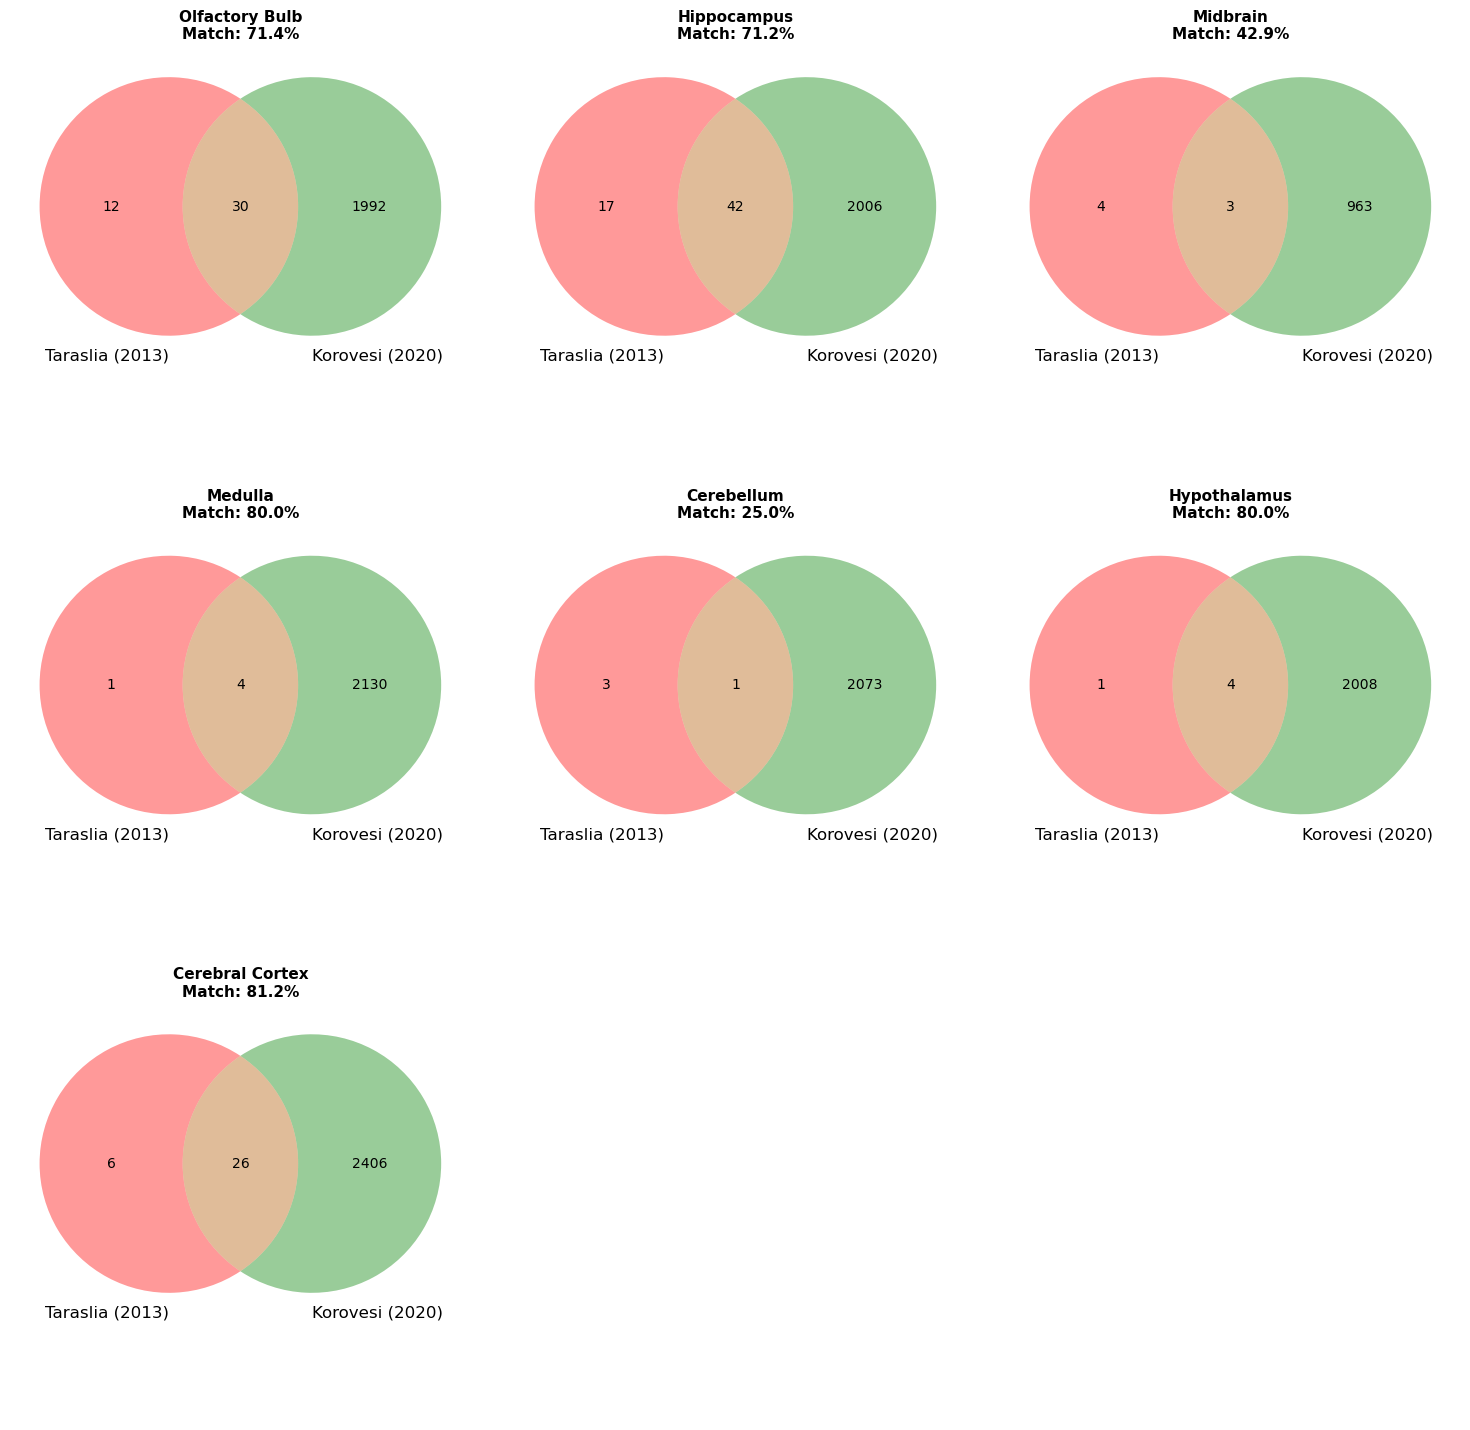

In [23]:
from matplotlib_venn import venn2

# Identify the common regions to iterate over
# We exclude "All Brain Regions" since Korovesi doesn't have a master file loaded yet
common_regions = [key for key in taraslia_dfs_dict.keys() if key in korovesi_dfs_dict]

# Setup for Summary Plot
regions_list = []
coverage_list = []

# Setup Grid (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, region in enumerate(common_regions):
    ax = axes[i]
    
    # Get Sets (Using the standardized 'UniprotID')
    set_old = set(taraslia_dfs_dict[region]['UniprotID'].dropna())
    set_new = set(korovesi_dfs_dict[region]['UniprotID'].dropna())
    
    # Calculate Stats
    intersection = len(set_old.intersection(set_new))
    percent = (intersection / len(set_old) * 100) if len(set_old) > 0 else 0
    
    regions_list.append(region)
    coverage_list.append(percent)

    only_old = len(set_old - set_new)
    only_new = len(set_new - set_old)
    shared   = intersection
    
    # Draw Venn
    v = venn2(subsets=(10, 10, 5), 
              set_labels=('Taraslia (2013)', 'Korovesi (2020)'), 
              ax=ax)
    
    ax.set_title(f"{region}\nMatch: {percent:.1f}%", fontsize=11, fontweight='bold')
    
    # Coloring
    if v.get_label_by_id('10'): v.get_label_by_id('10').set_text(f"{only_old}")
    if v.get_label_by_id('01'): v.get_label_by_id('01').set_text(f"{only_new}")
    if v.get_label_by_id('11'): v.get_label_by_id('11').set_text(f"{shared}")

# Clean up empty slots
for j in range(i+1, 9):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

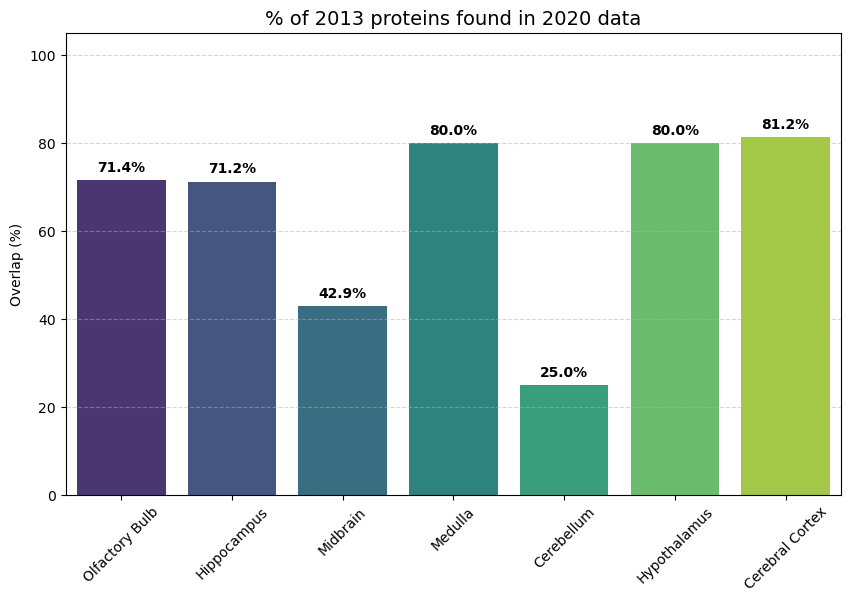

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=regions_list, y=coverage_list, hue=regions_list, palette='viridis', legend=False)

plt.title('% of 2013 proteins found in 2020 data', fontsize=14)
plt.ylabel('Overlap (%)')
plt.ylim(0, 105)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels
for i, v in enumerate(coverage_list):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')

plt.show()

# Combined data

In [25]:
# Create a dictionary to hold the FINAL combined sets of proteins
combined_brain_data = {}

for region in common_regions:
    # Get sets from both studies (using the mapped IDs)
    set_old = set(taraslia_dfs_dict[region]['UniprotID'].dropna())
    set_new = set(korovesi_dfs_dict[region]['UniprotID'].dropna())
    
    # Union: Keep a protein if it appears in EITHER study
    combined_set = set_old.union(set_new)
    combined_brain_data[region] = combined_set

CORE PROTEOME (Common to all 7 regions): 477 proteins
Example proteins: ['P31938', 'Q8BTX9', 'Q8K021', 'P60904', 'Q80XI4']

==================== Unique proteins ====================
Olfactory Bulb: 177
Hippocampus: 144
Midbrain: 72
Medulla: 150
Cerebellum: 179
Hypothalamus: 161
Cerebral Cortex: 302


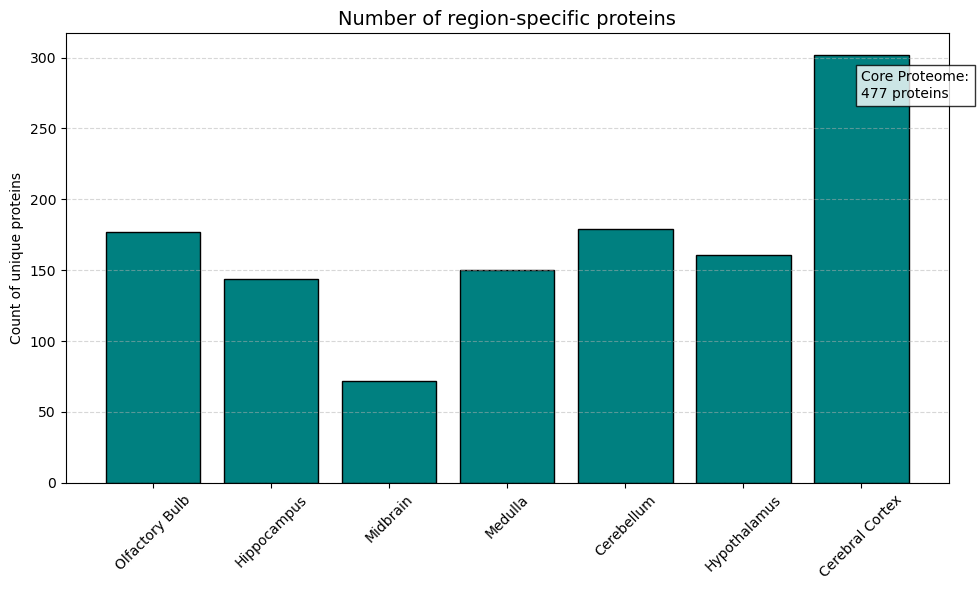

In [26]:
# The "Core Proteome" (Proteins found in ALL 7 regions)
core_proteome = set.intersection(*combined_brain_data.values())

print(f"CORE PROTEOME (Common to all 7 regions): {len(core_proteome)} proteins")
print(f"Example proteins: {list(core_proteome)[:5]}")

# Region-Specific Proteins (Found ONLY in one region)
print(f"\n{'='*20} Unique proteins {'='*20}")
unique_markers = {}

for region, current_set in combined_brain_data.items():
    # Union of ALL OTHER regions
    other_regions = set.union(*[s for r, s in combined_brain_data.items() if r != region])
    
    # Subtract others from current
    unique_to_this_region = current_set - other_regions
    unique_markers[region] = len(unique_to_this_region)
    
    print(f"{region}: {len(unique_to_this_region)}")

# Plot of the Results
plt.figure(figsize=(10, 6))
plt.bar(unique_markers.keys(), unique_markers.values(), color='teal', edgecolor='black')
plt.title("Number of region-specific proteins", fontsize=14)
plt.ylabel("Count of unique proteins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add label for the Core Proteome for context
plt.text(len(unique_markers)-1, max(unique_markers.values())*0.9, 
         f"Core Proteome:\n{len(core_proteome)} proteins", 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

plt.tight_layout()
plt.show()

The analysis of the combined 2013 (Taraslia) and 2020 (Korovesi) datasets reveals some critical points:
- Although each brain region contains over 2,000 proteins, the vast majority (>90%) are shared across all regions.
- Biological Explanation: This represents the "Core Proteome"—the essential machinery required by all neuronal cells for survival (e.g., cytoskeleton maintenance, energy metabolism, DNA replication). It is expected that the Hippocampus and Cortex share thousands of these "housekeeping" proteins.
- The "Unique" counts (e.g., ~100–300 proteins per region) appear small compared to the total, but these are the most biologically significant findings.
- Significance: These few unique proteins represent the specialized functional markers (biomarkers) that define the specific role of each region (e.g., olfactory receptors in the Bulb vs. memory-associated proteins in the Hippocampus).

# GO Analysis

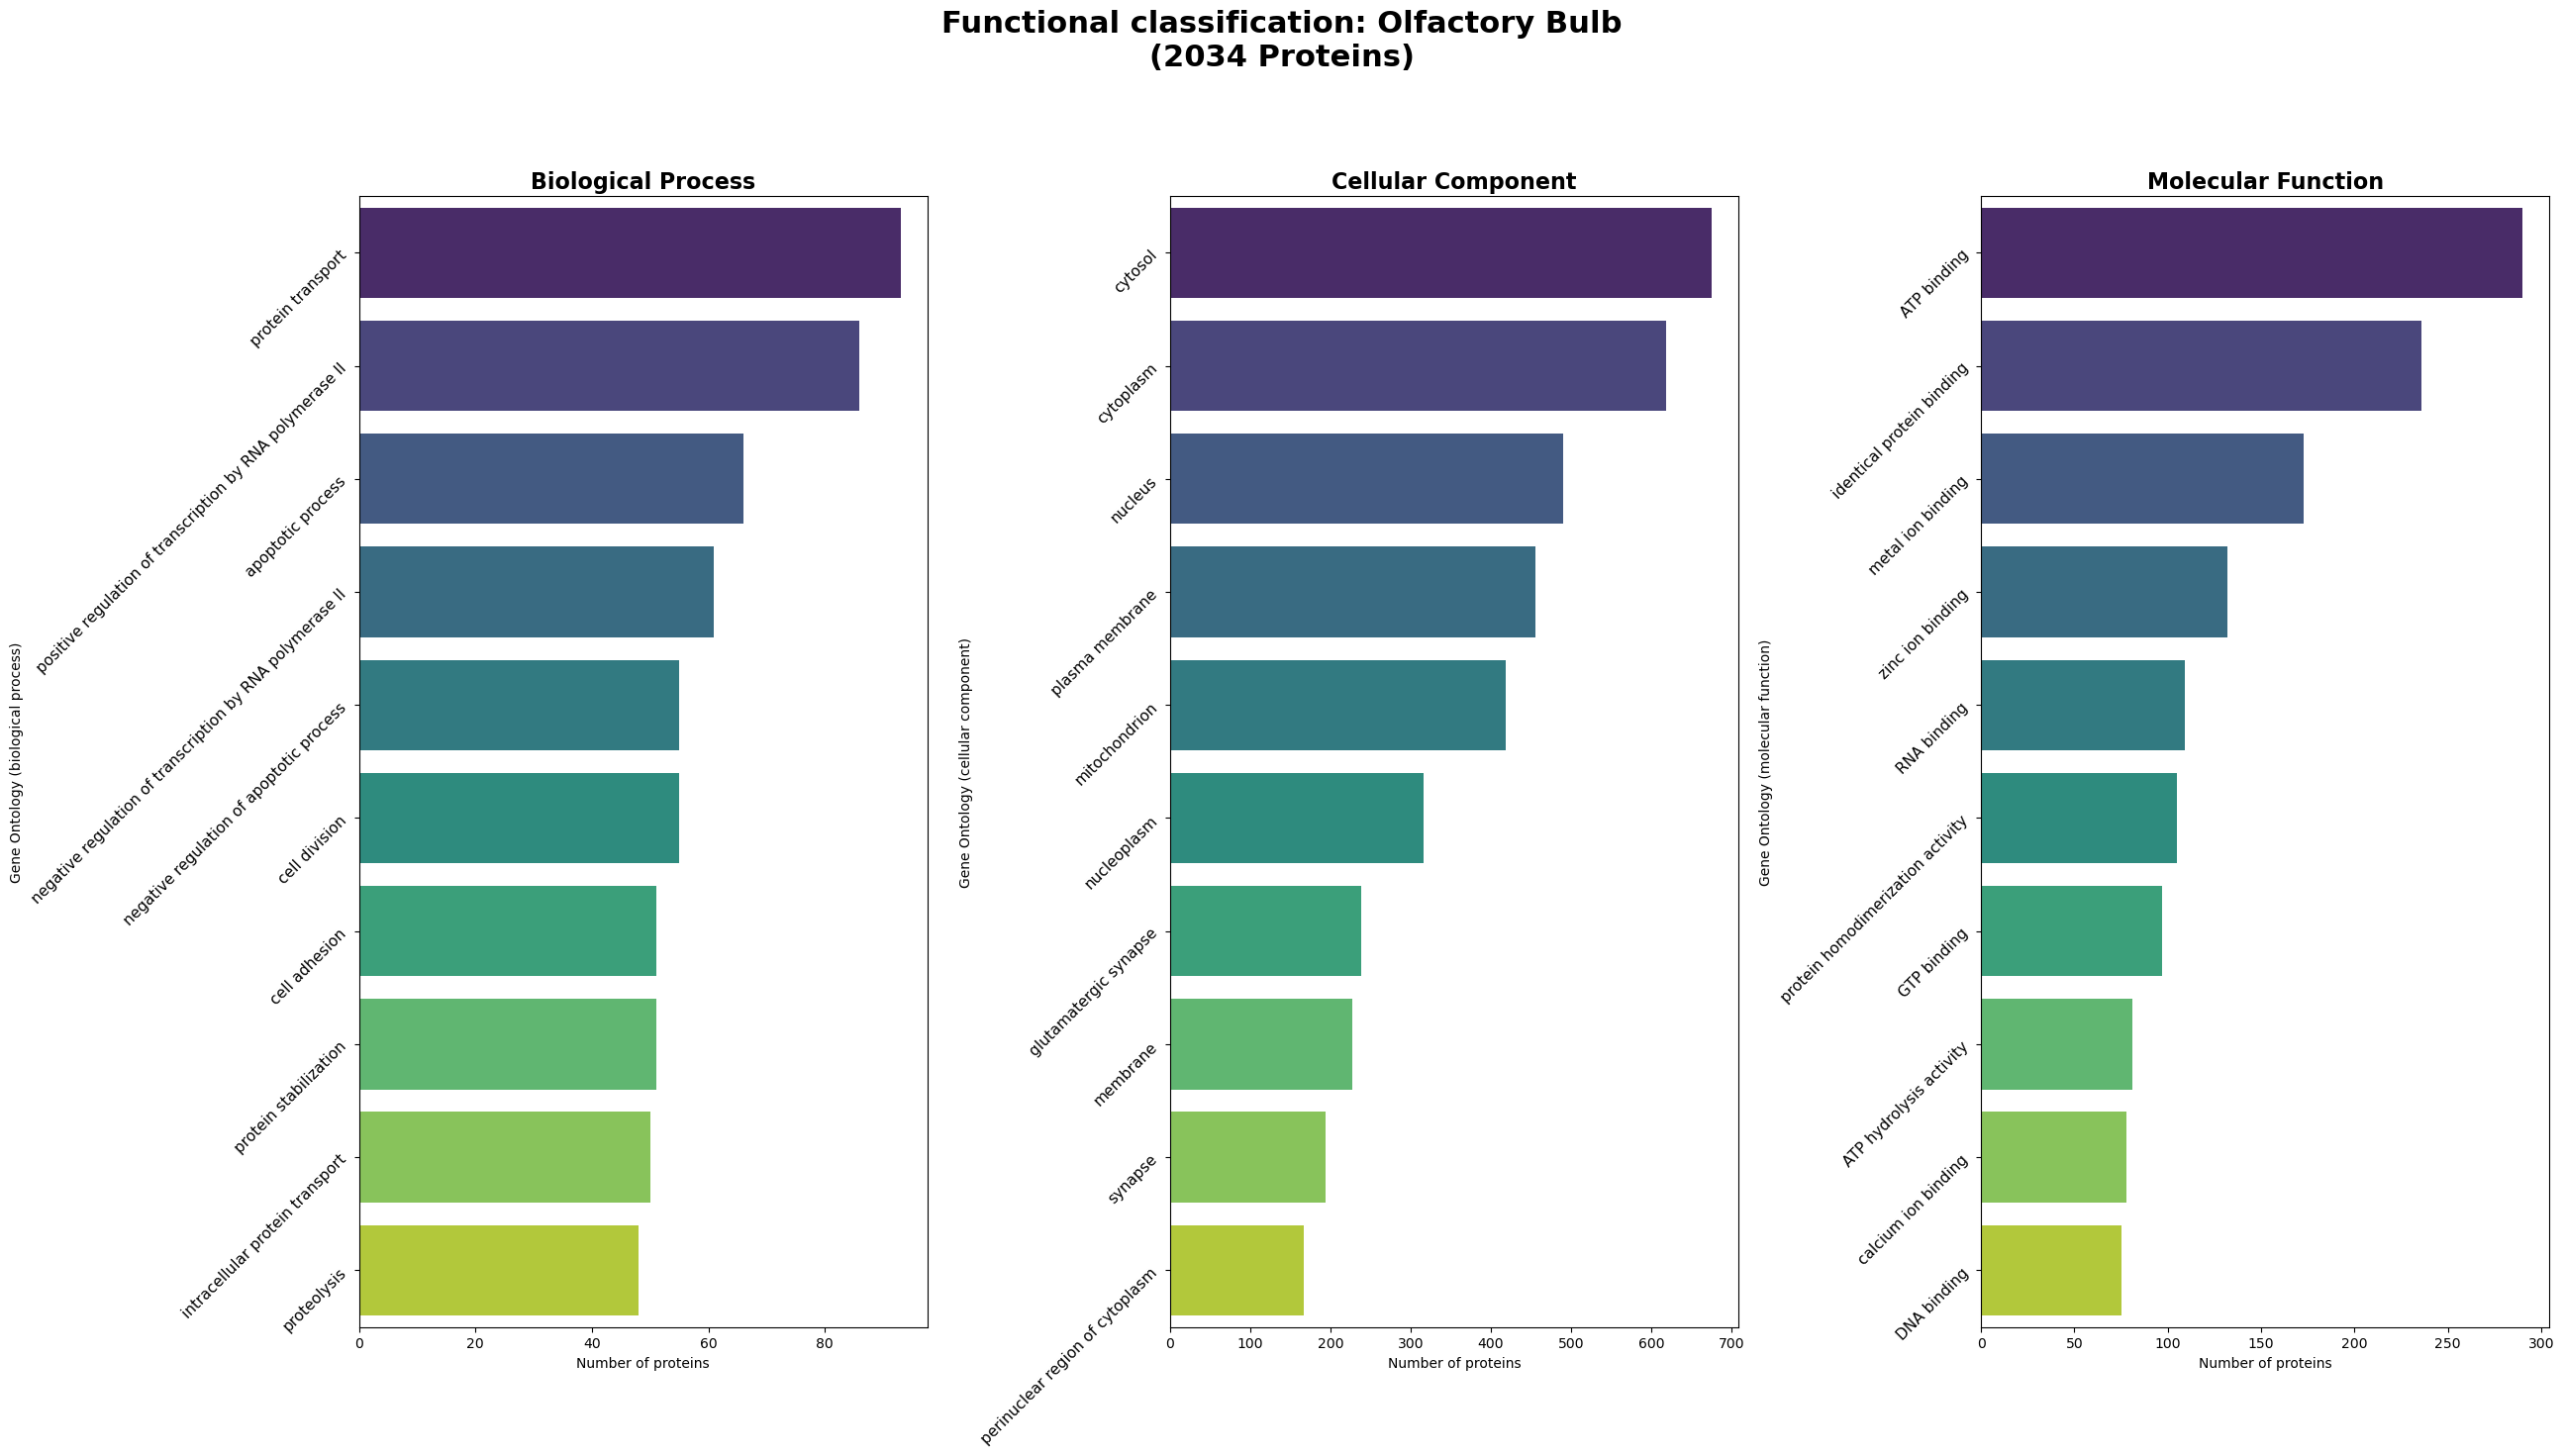

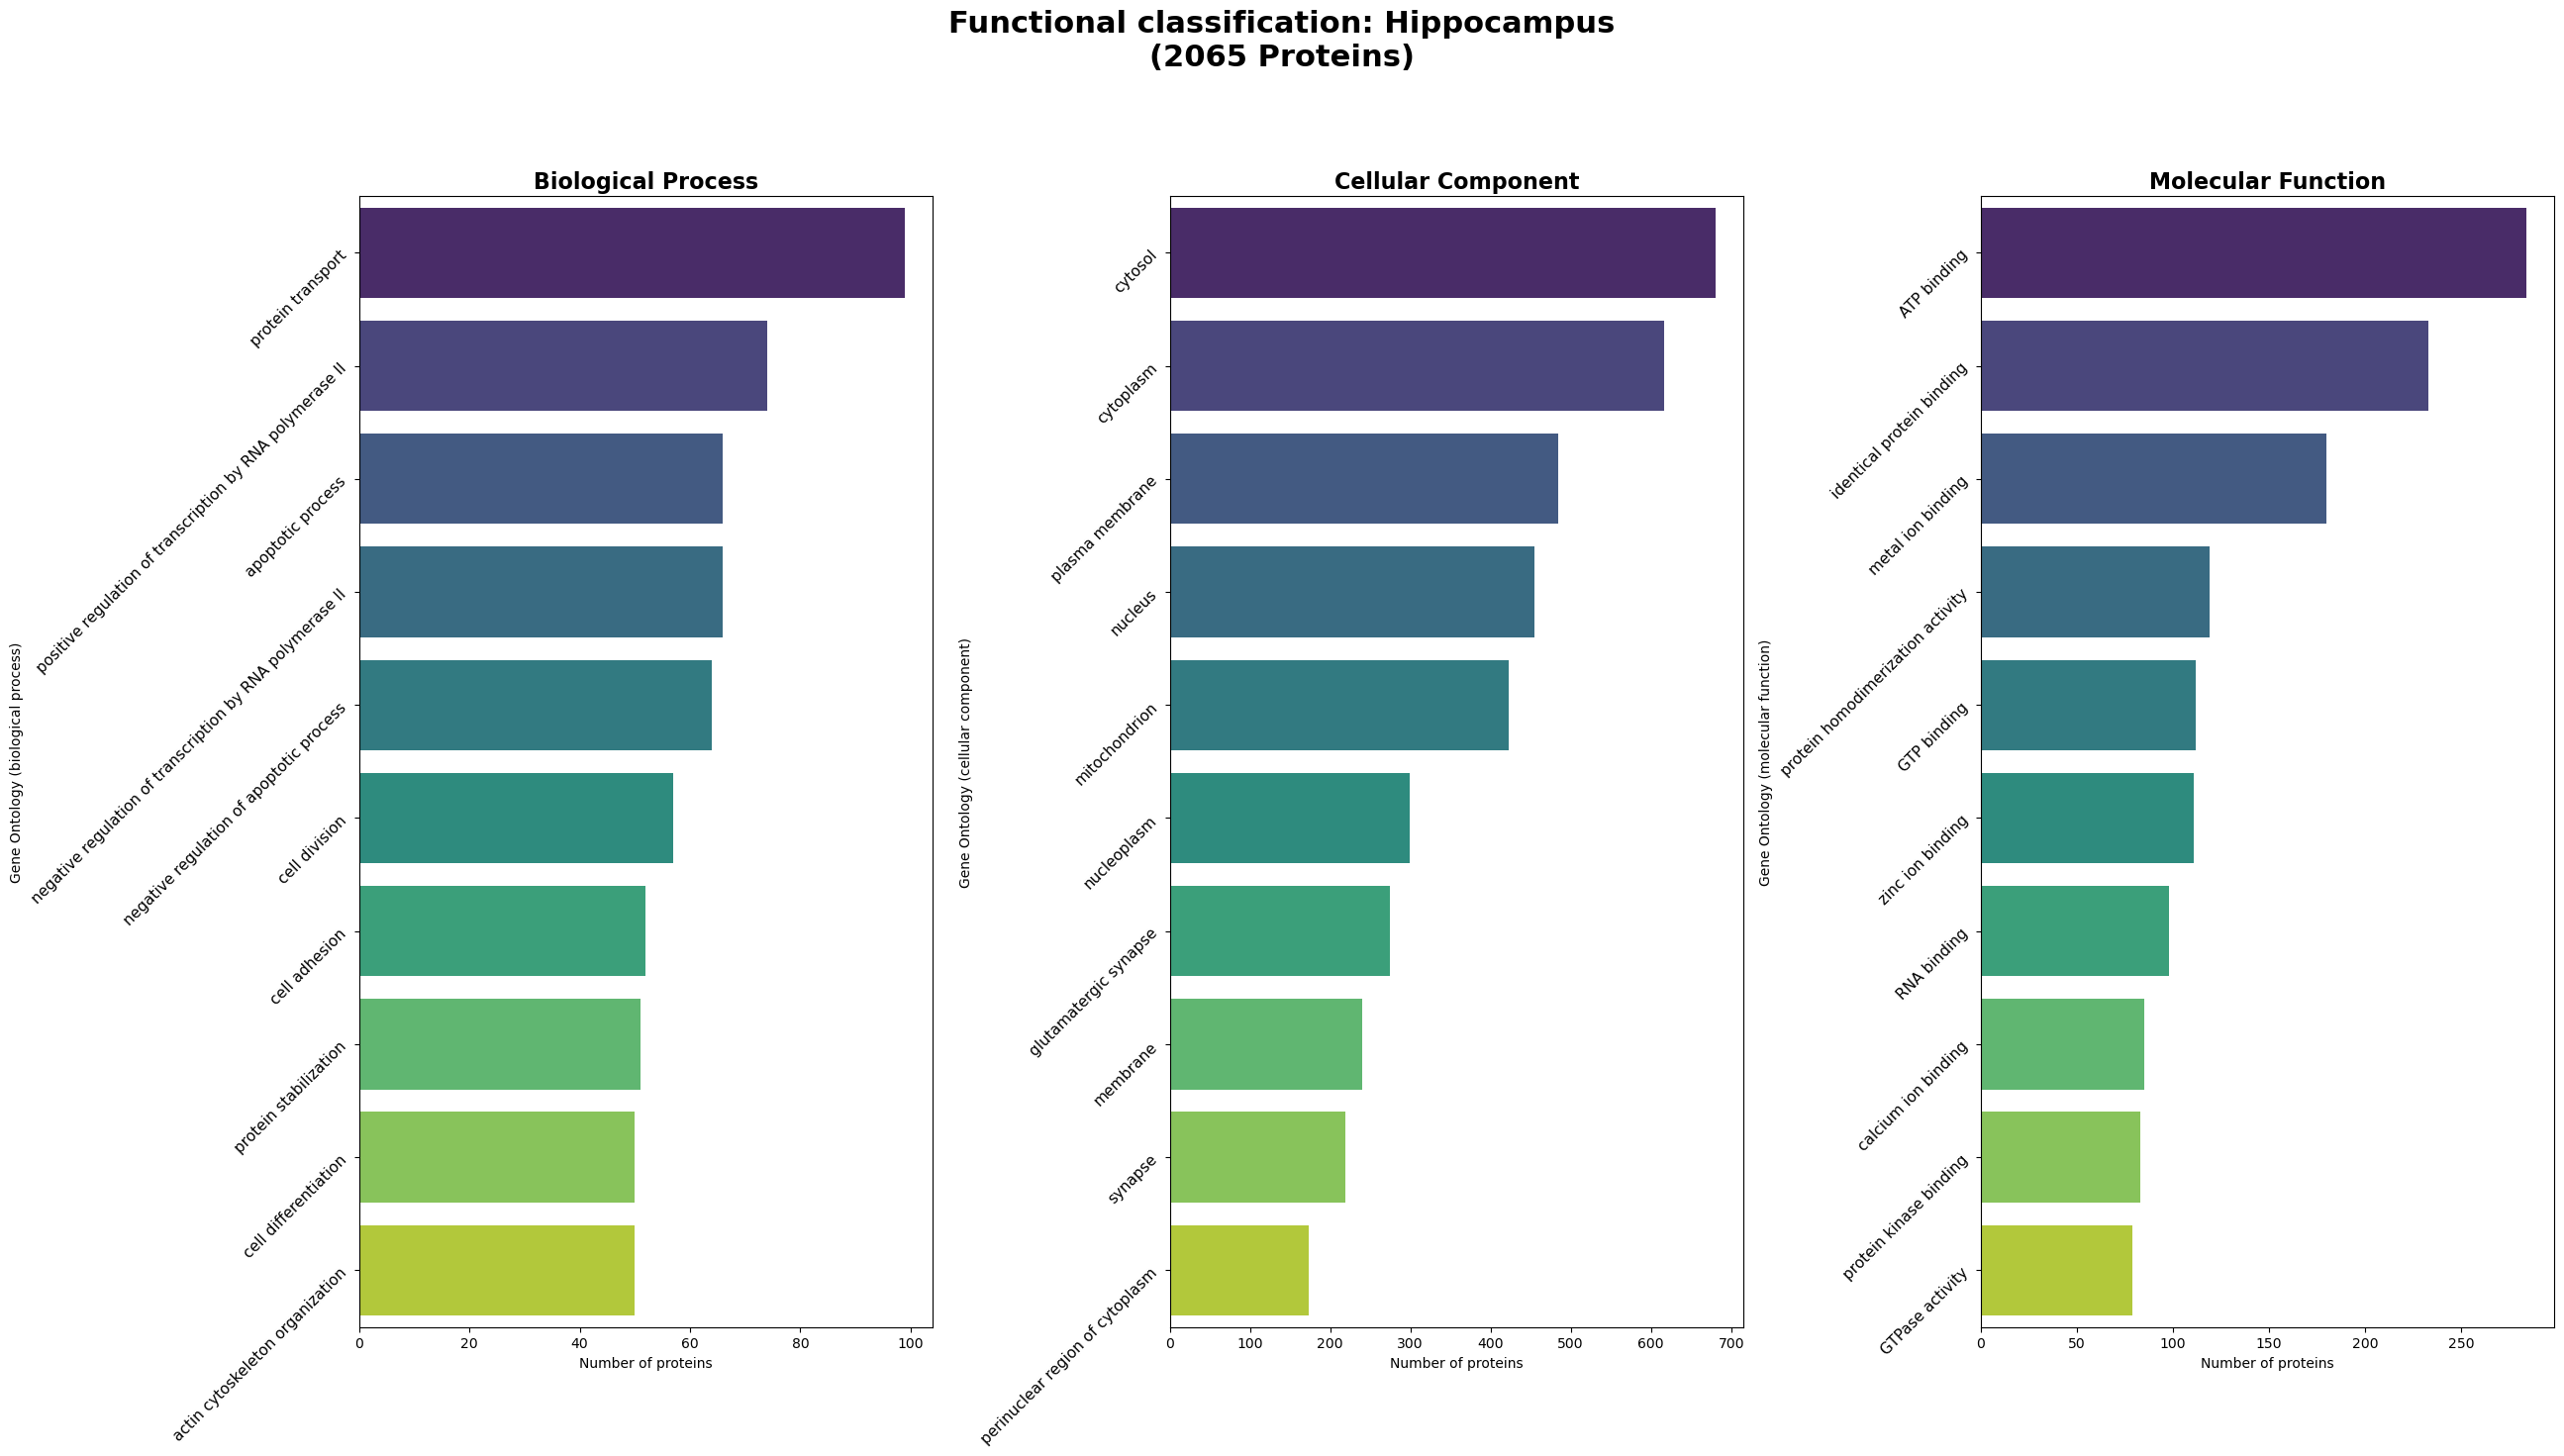

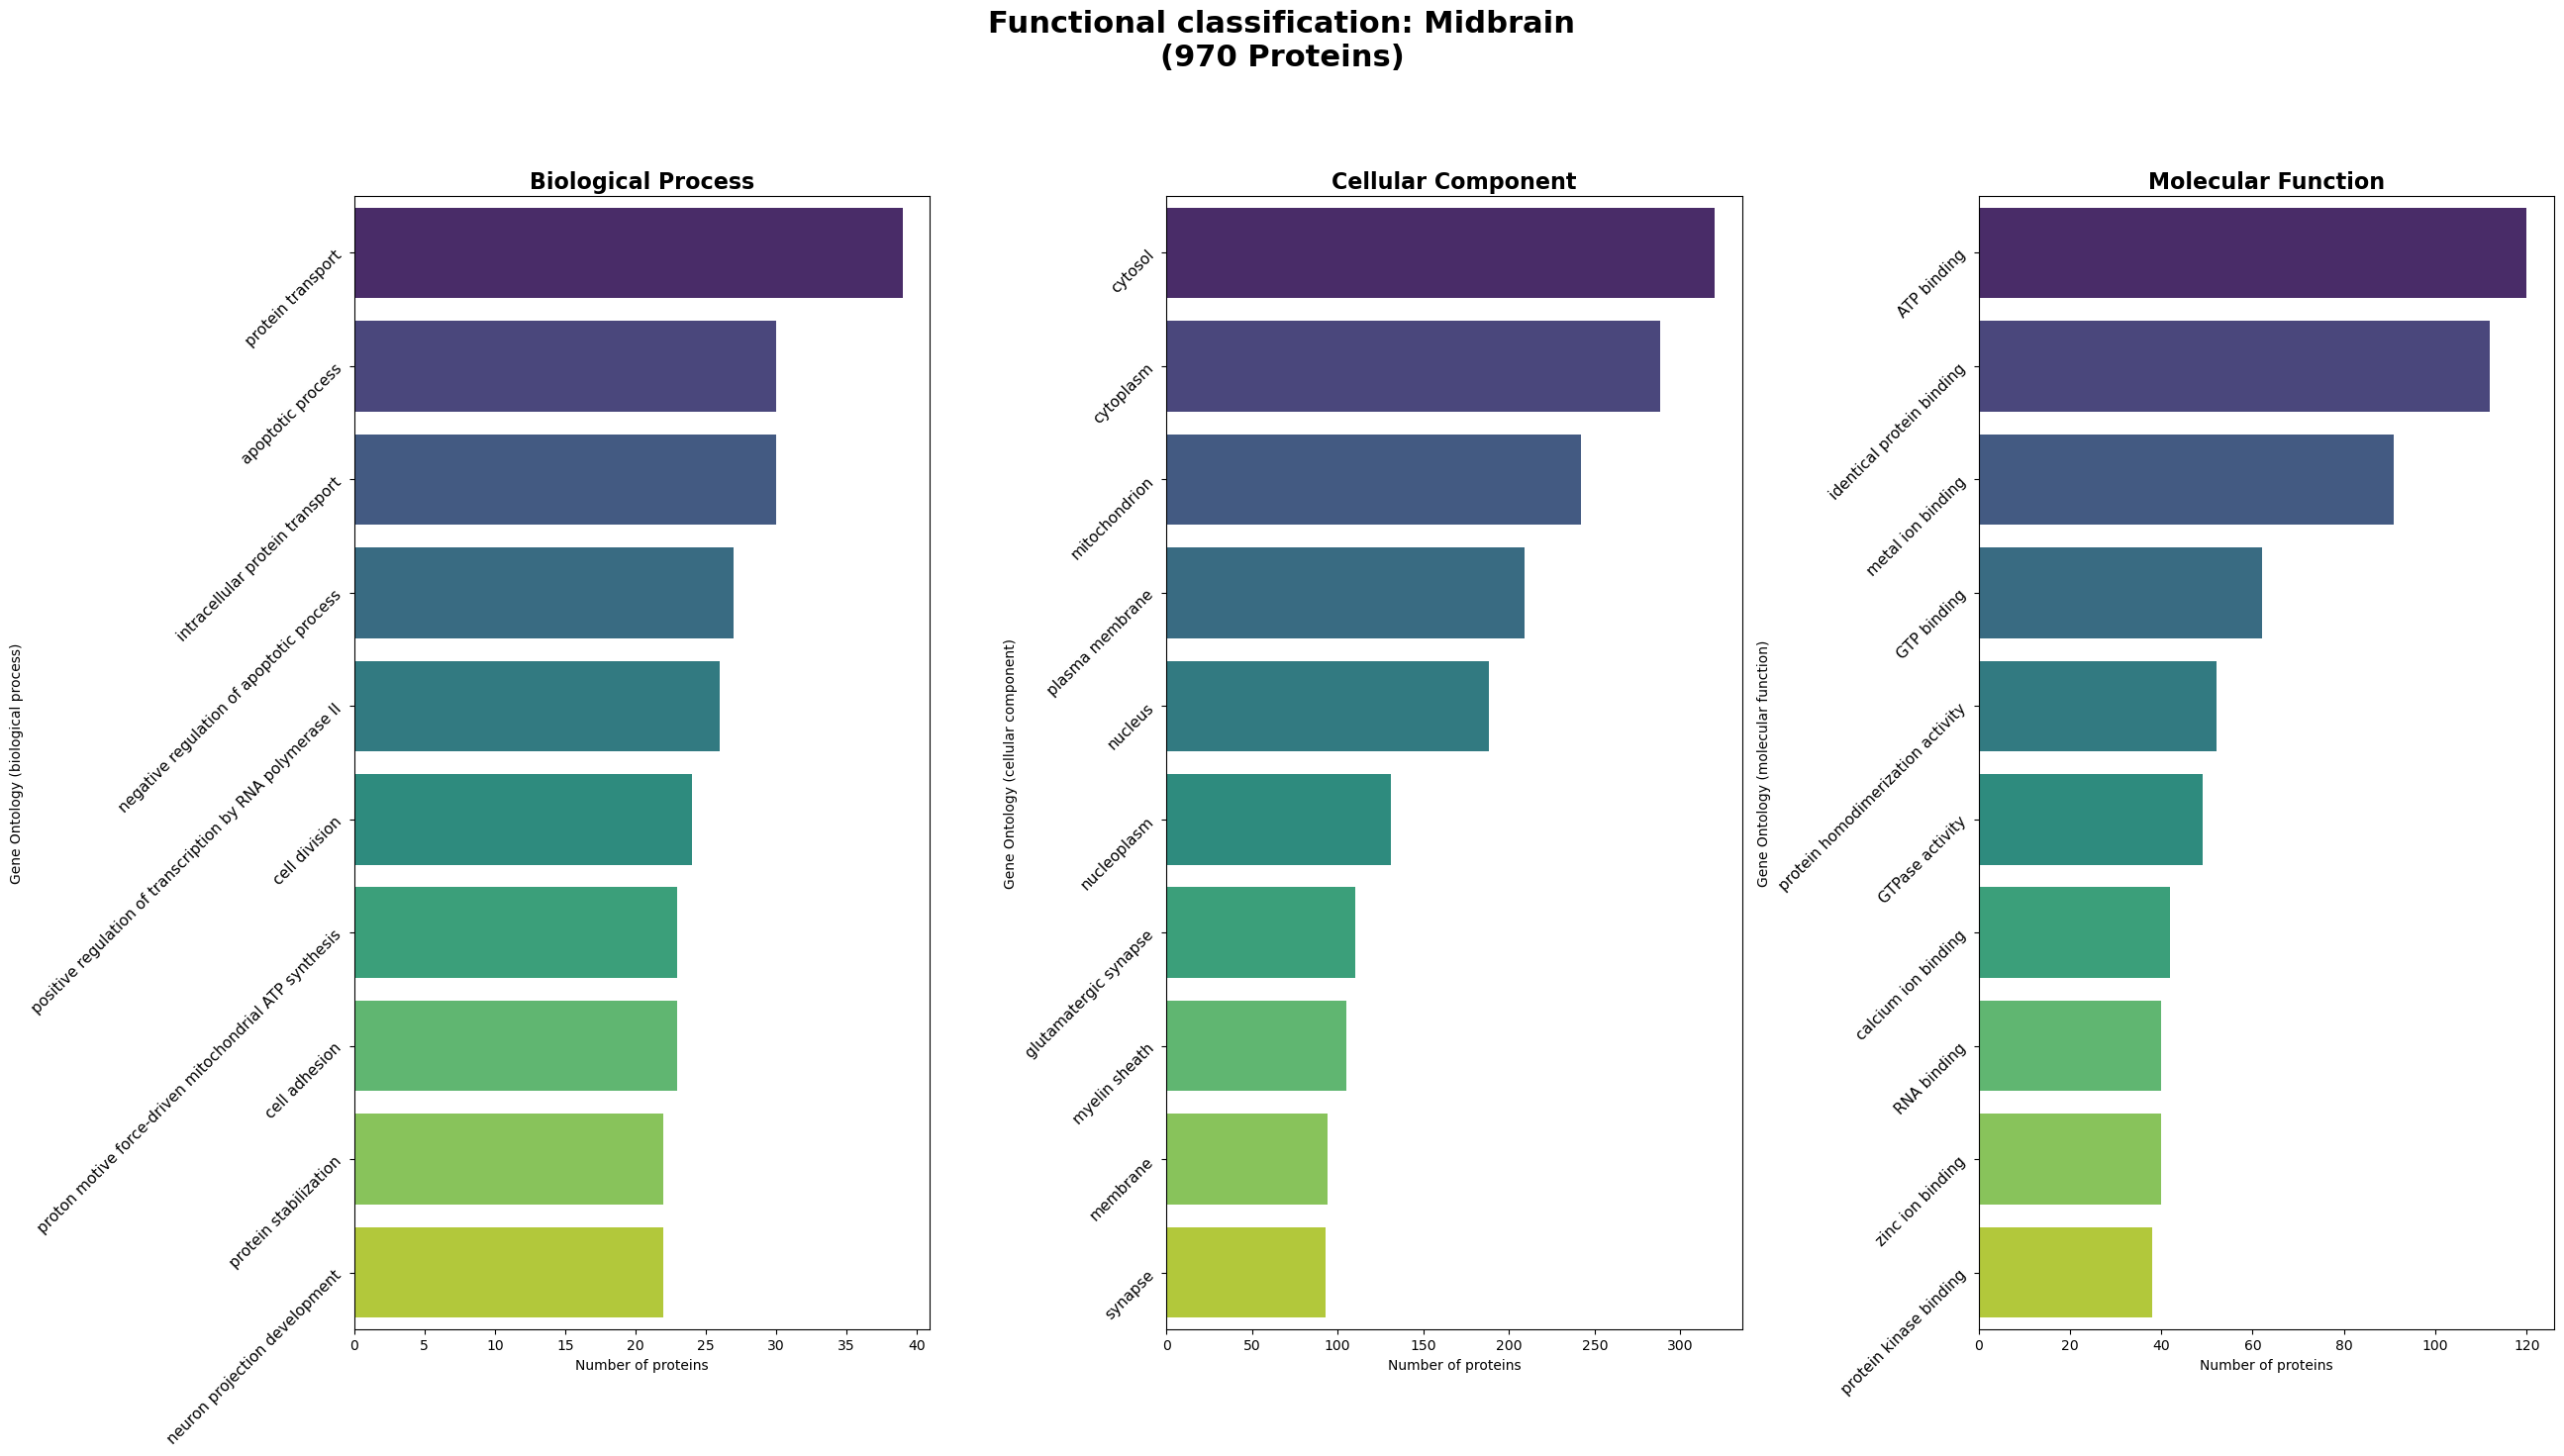

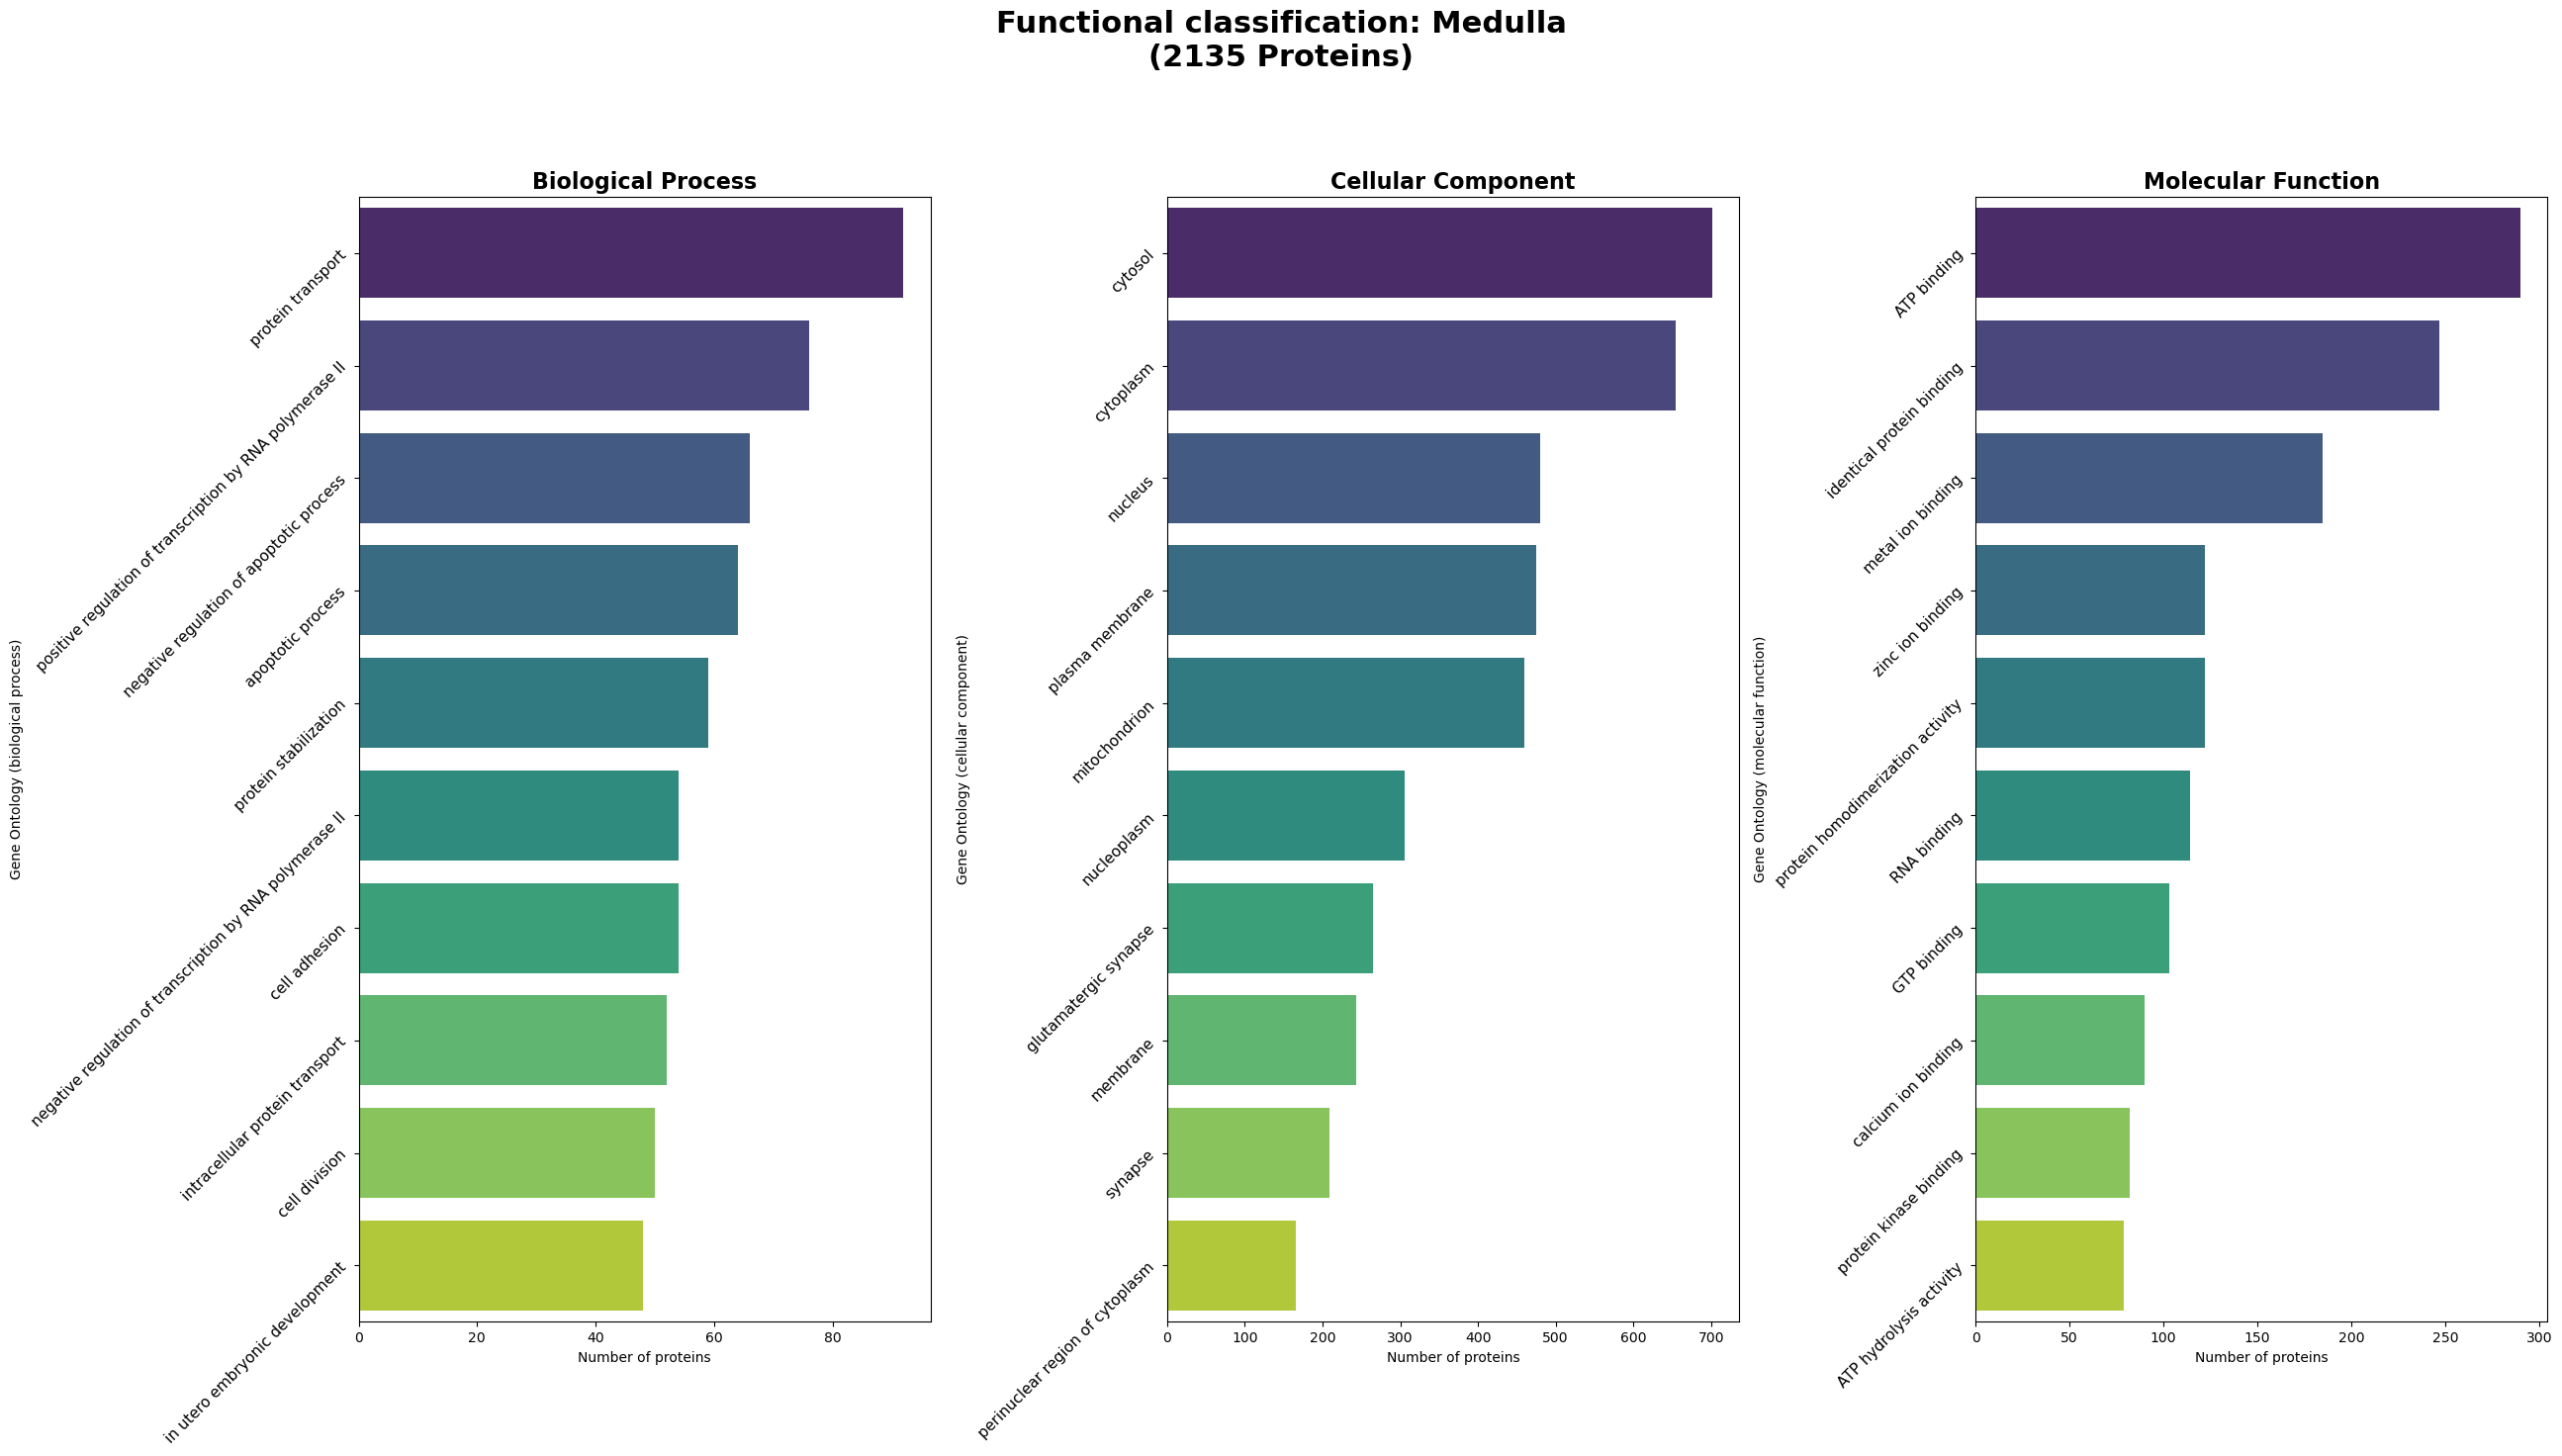

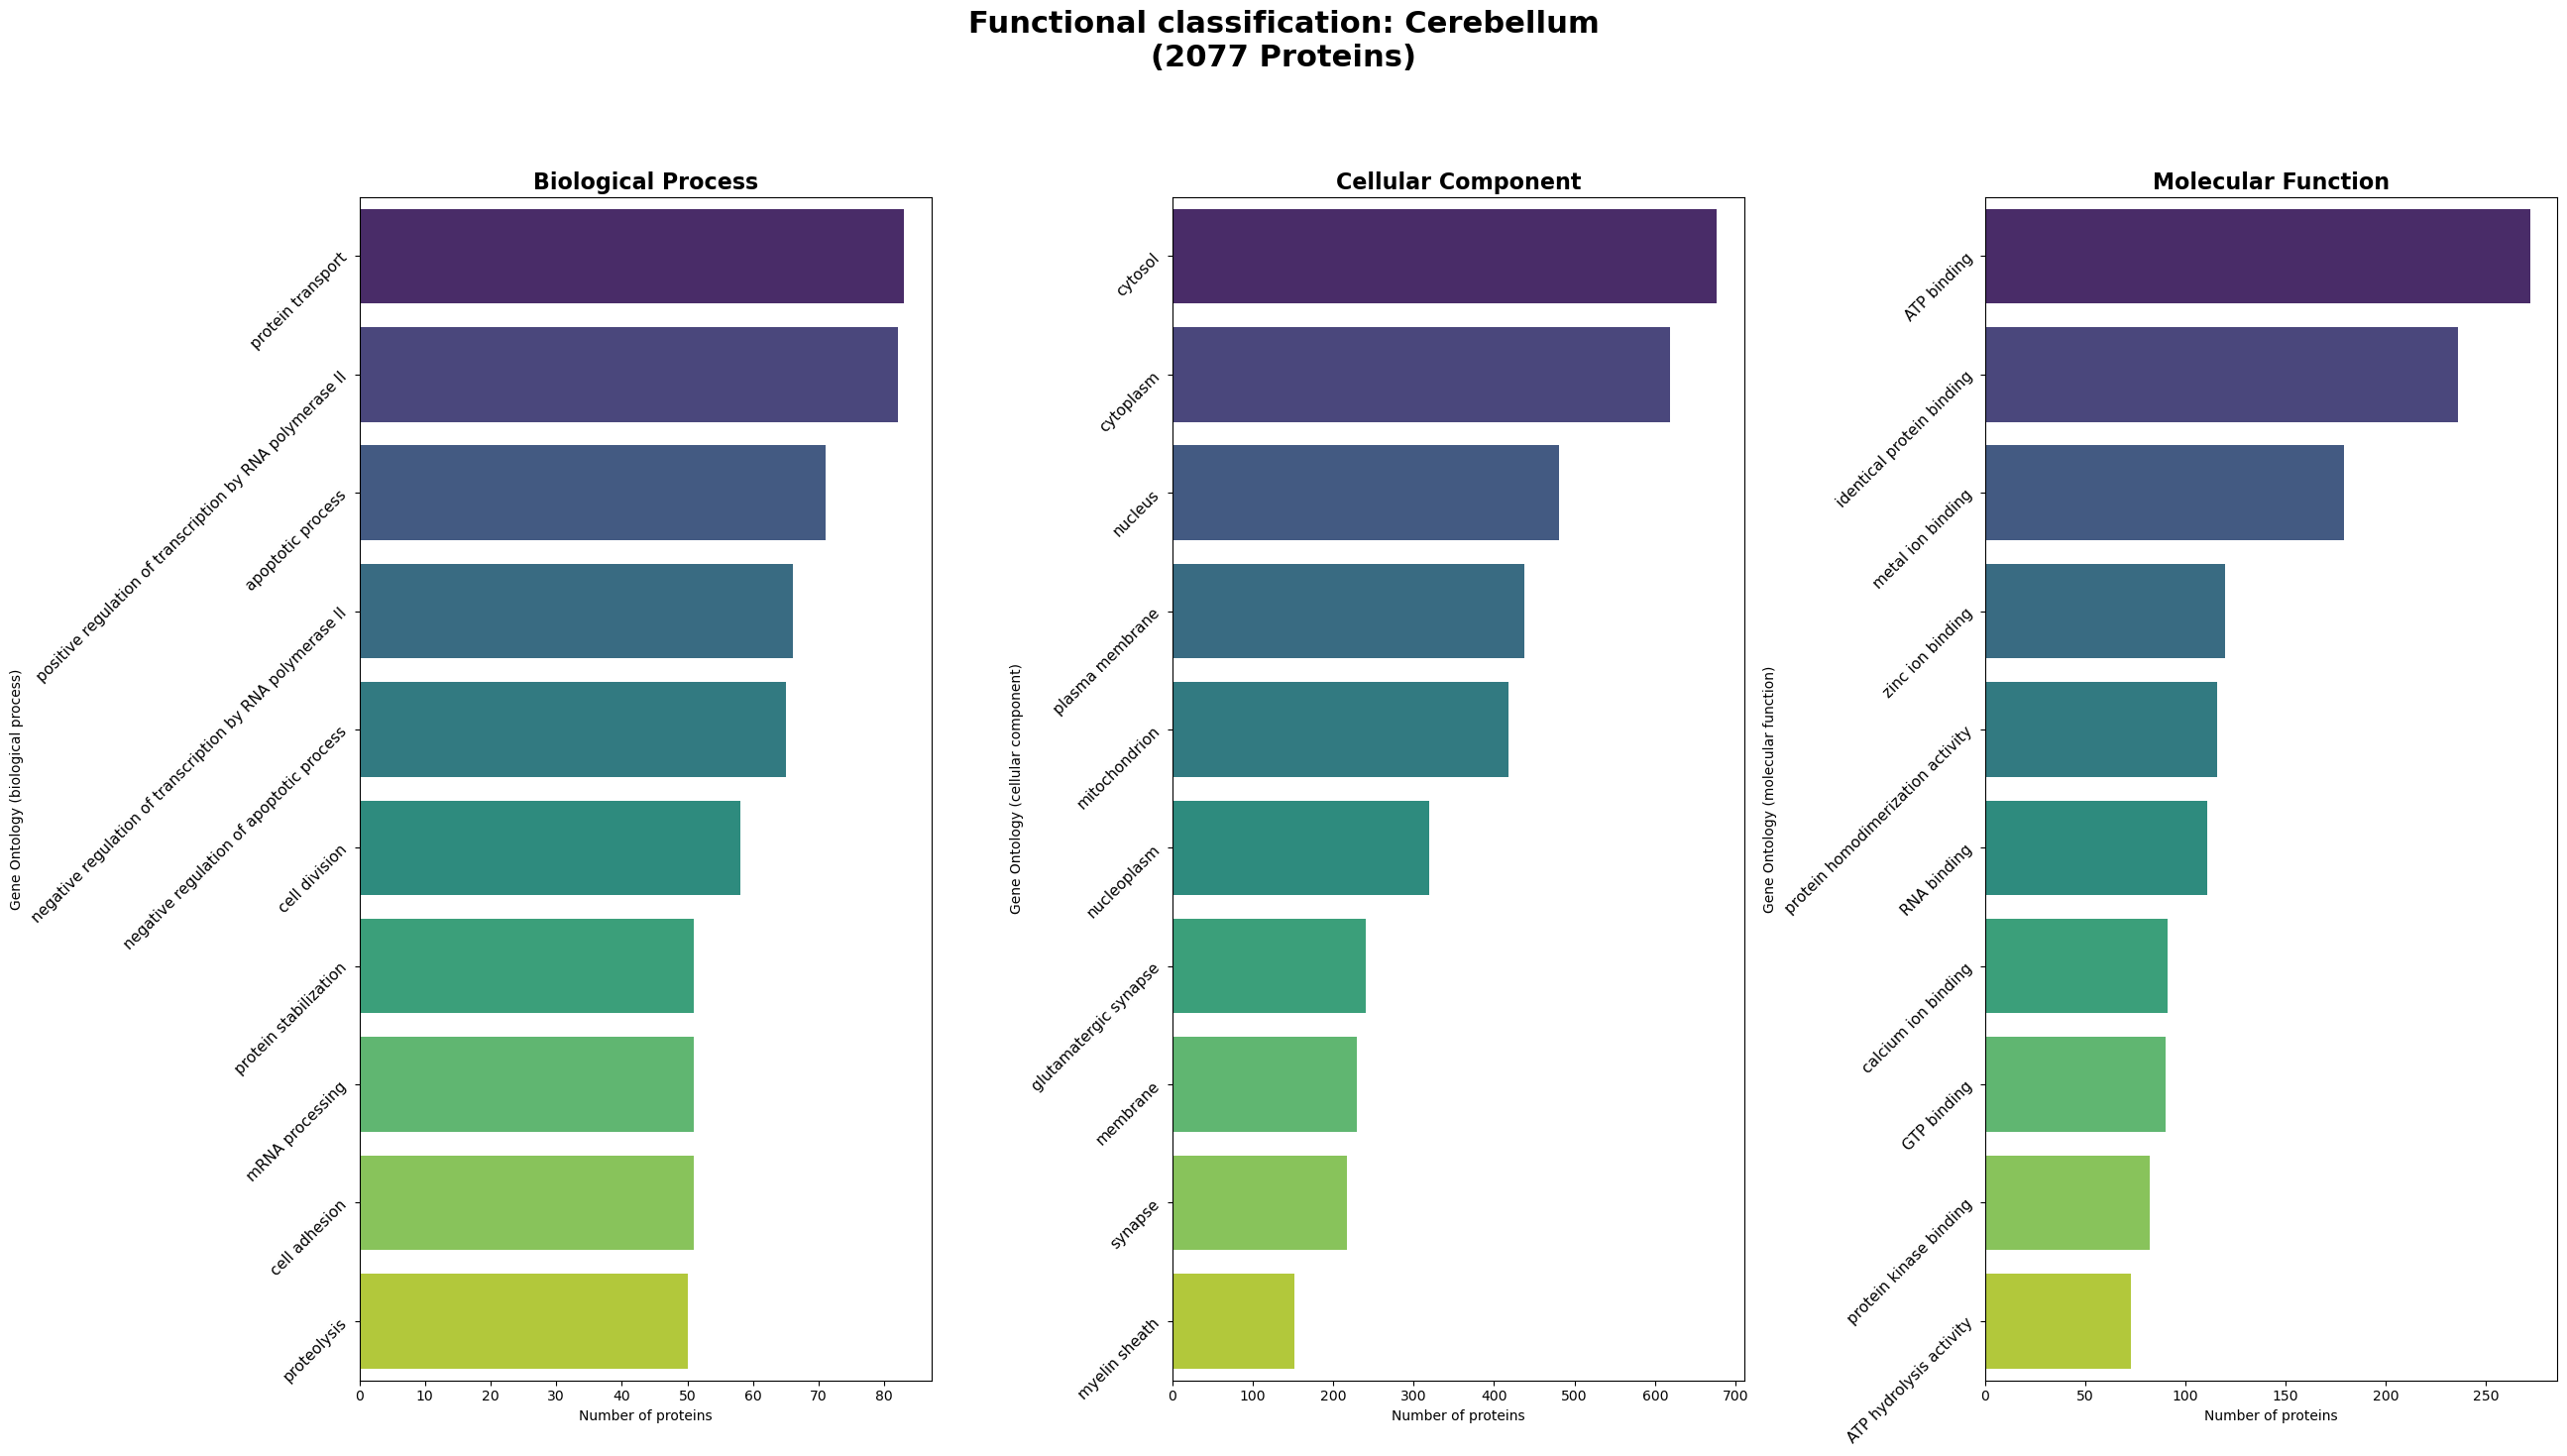

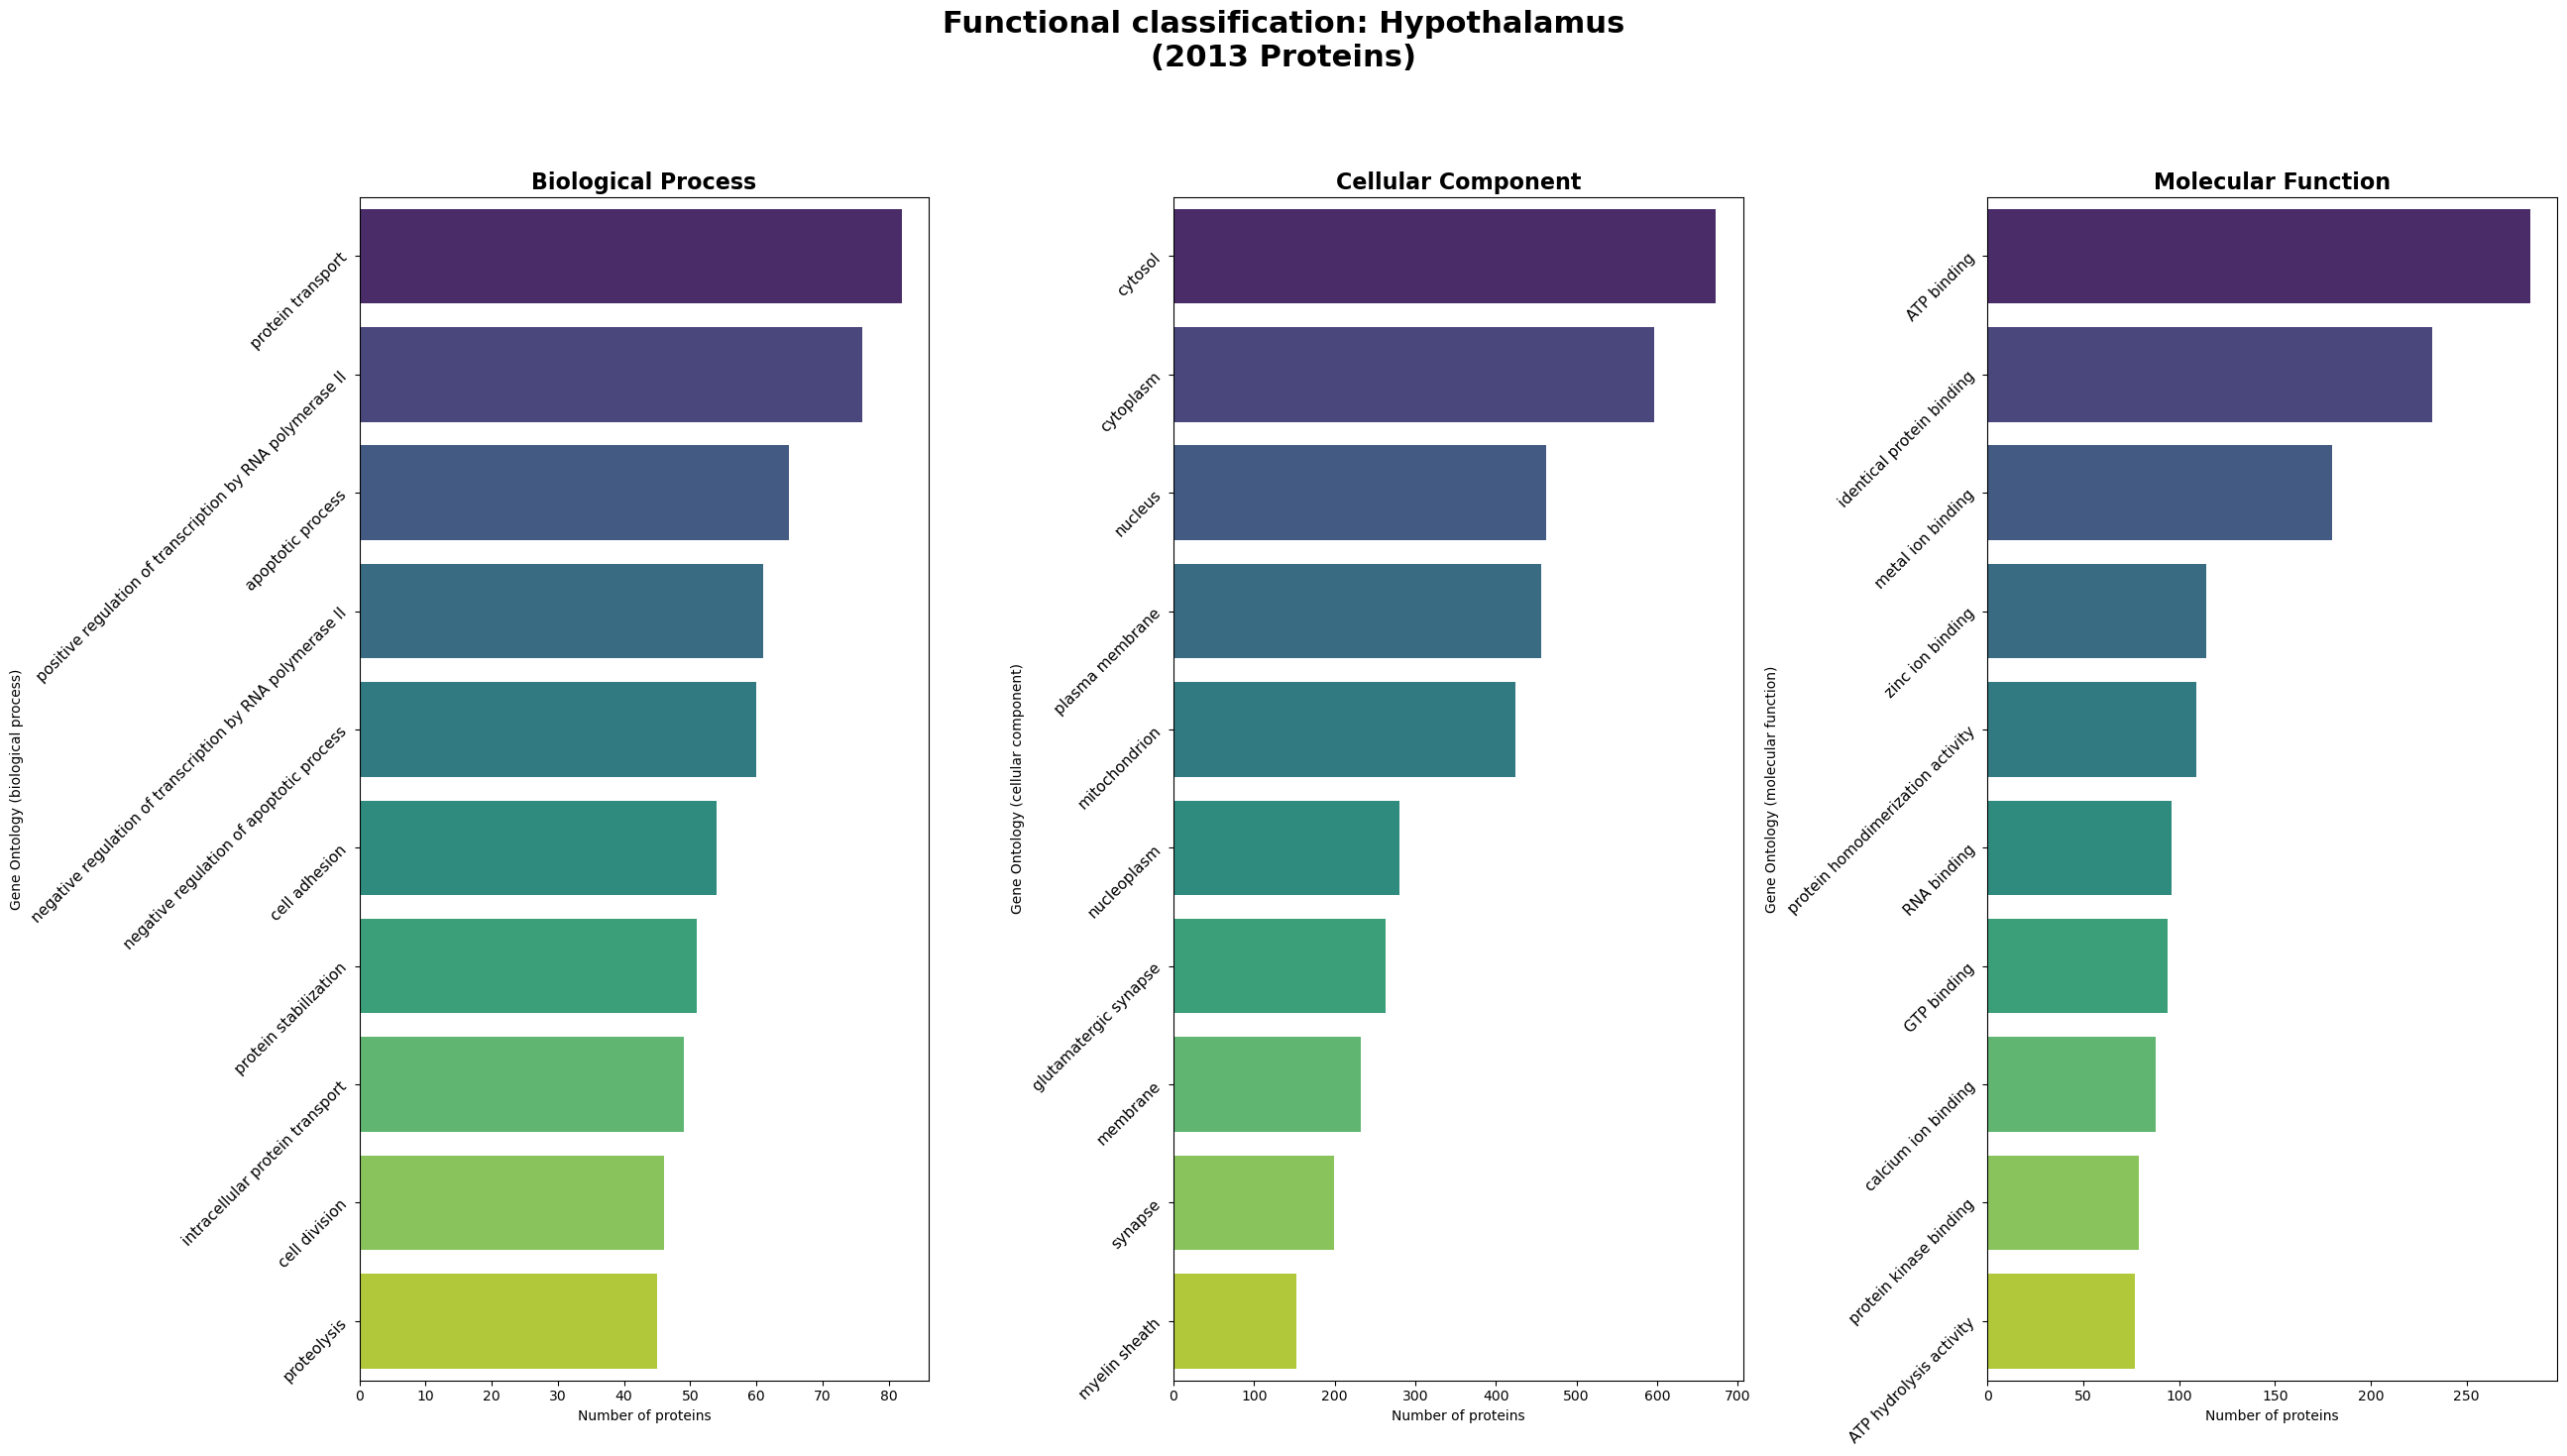

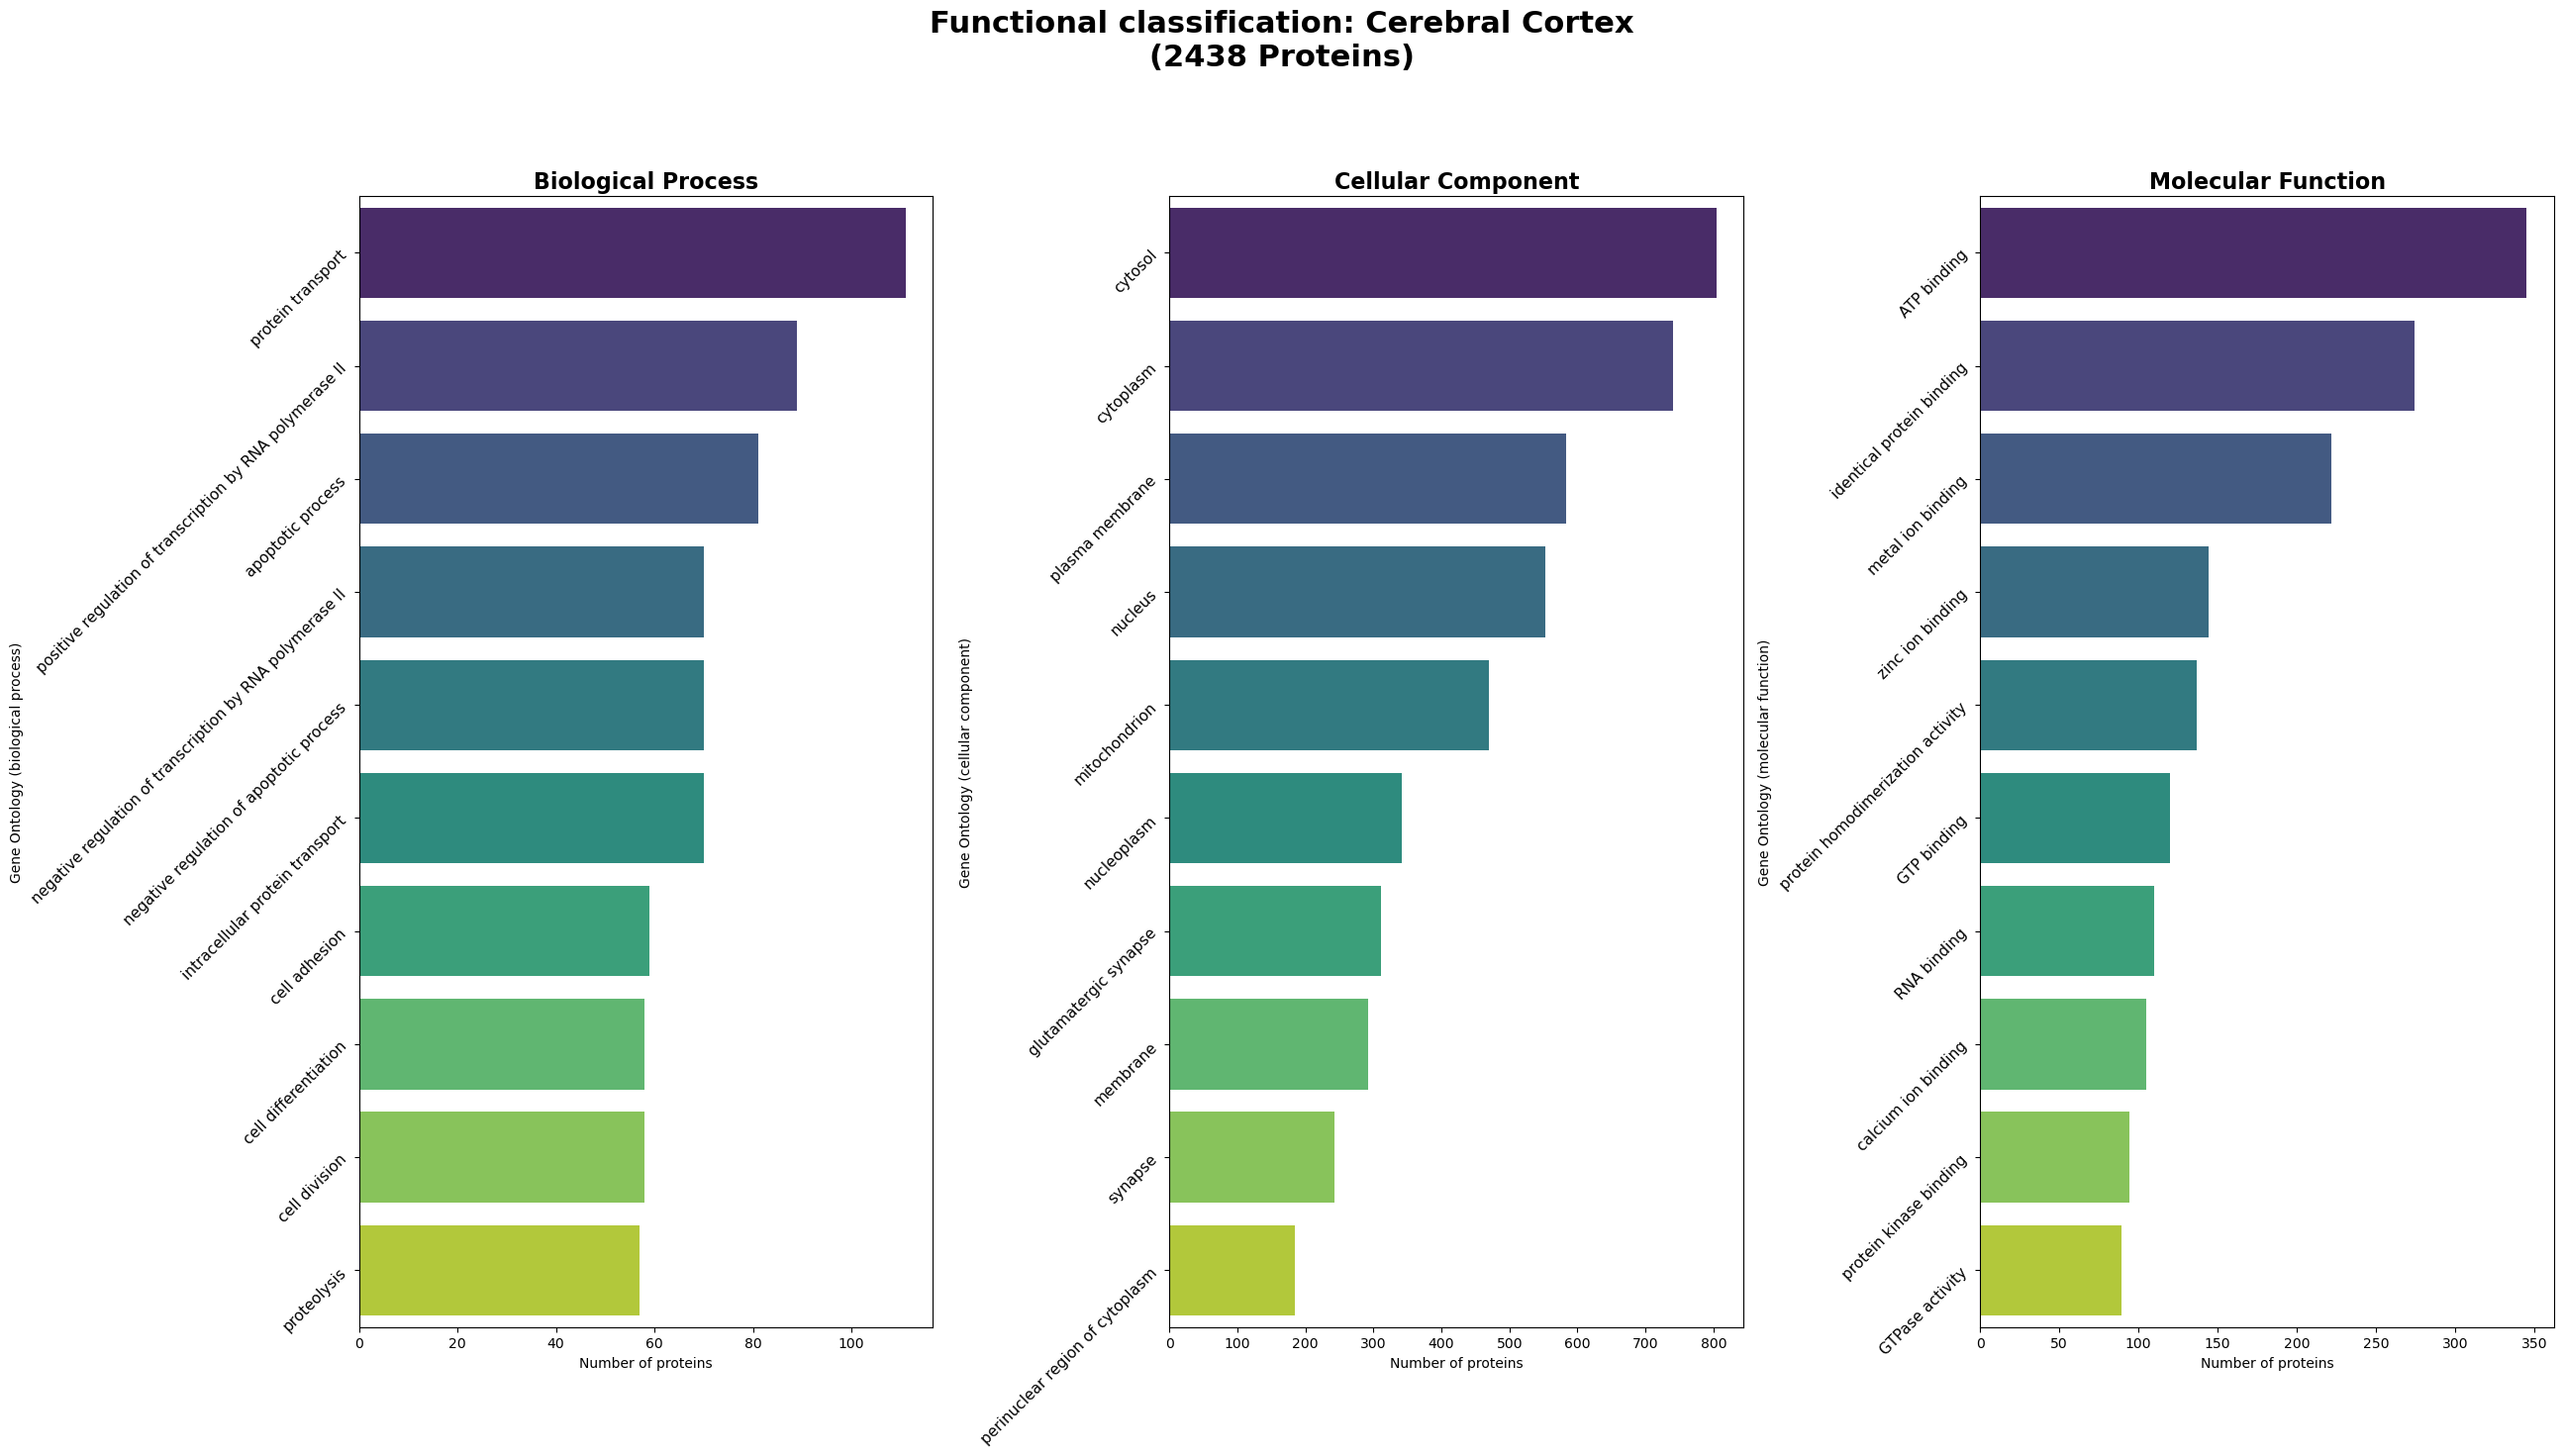

In [27]:
import os

output_dir = '../data/functional_plots'
os.makedirs(output_dir, exist_ok=True)

# Define categories based on the UniProt table columns
categories = {
    'Gene Ontology (biological process)': 'Biological Process',
    'Gene Ontology (cellular component)': 'Cellular Component',
    'Gene Ontology (molecular function)': 'Molecular Function'
}

for abbrev, full_name in region_abbreviation_to_name.items():
    if full_name not in combined_brain_data:
        continue
        
    # Get the unique UniProt IDs for this region
    protein_ids = combined_brain_data[full_name]
    
    # Filter the UniProt reference data
    region_df = df_uniprot[df_uniprot['Entry'].isin(protein_ids)]
    
    fig, axes = plt.subplots(1, 3, figsize=(26, 14)) 
    fig.suptitle(f"Functional classification: {full_name}\n({len(protein_ids)} Proteins)", 
                 fontsize=22, fontweight='bold', y=1.05)

    for i, (col, title) in enumerate(categories.items()):
        # Split multiple terms, explode to rows, and remove [GO:xxxxxx]
        counts = (region_df[col]
                  .dropna()
                  .str.split('; ')
                  .explode()
                  .str.replace(r' \[GO:\d+\]', '', regex=True)
                  .value_counts()
                  .head(10))
        
        if not counts.empty:
            sns.barplot(x=counts.values, y=counts.index, ax=axes[i], palette="viridis", hue=counts.index, legend=False)
            axes[i].set_title(title, fontsize=16, fontweight='bold')
            axes[i].set_xlabel("Number of proteins")

            axes[i].tick_params(axis='y', rotation=45)            
            axes[i].tick_params(axis='y', labelsize=11)
        else:
            axes[i].text(0.5, 0.5, "No data", ha='center', va='center')

    filename = f"functional_{full_name.replace(' ', '_').lower()}.png"
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight', dpi=300)
    
    plt.tight_layout()
    plt.show()

# Database Preparation

## Proteins Table

In [28]:
# Select unique proteins and drop GO columns
df_proteins_table = df_uniprot[['Entry', 'Entry Name', 'Protein names']].drop_duplicates()
df_proteins_table.to_csv('../data/db/sql_proteins.csv', index=False, header=False)

## GO Terms Table

In [29]:
import re

# Combine all GO columns into one series to get every unique term
all_go_raw = pd.concat([
    df_uniprot['Gene Ontology (biological process)'],
    df_uniprot['Gene Ontology (cellular component)'],
    df_uniprot['Gene Ontology (molecular function)']
]).dropna().str.split('; ').explode().unique()

# Use regex to separate "Term Name" from "[GO:ID]"
df_goterms_table = pd.Series(all_go_raw).str.extract(r'(?P<TermName>.+) \[(?P<GoID>GO:\d+)\]')
df_goterms_table = df_goterms_table[['GoID', 'TermName']]

# Drop duplicates and save
df_goterms_table = df_goterms_table.drop_duplicates()
df_goterms_table.to_csv('../data/db/sql_goterms.csv', index=False, header=False)

## Protein GO Map Table

In [30]:
map_data = []

# Iterate through the three GO categories
for col in ['Gene Ontology (biological process)', 'Gene Ontology (cellular component)', 'Gene Ontology (molecular function)']:
    # Explode the column so each protein-GO pair is a row
    temp_df = df_uniprot[['Entry', col]].dropna()
    temp_df[col] = temp_df[col].str.split('; ')
    exploded = temp_df.explode(col)
    
    # Extract just the GO:ID part using regex
    exploded['GoID'] = exploded[col].str.extract(r'\[(GO:\d+)\]')
    map_data.append(exploded[['Entry', 'GoID']])

df_protein_go_map = pd.concat(map_data).drop_duplicates().dropna()
df_protein_go_map.to_csv('../data/db/sql_protein_go_map.csv', index=False, header=False)

## Region Observations Table

In [31]:
observations = []

for region_name, protein_set in combined_brain_data.items():
    for p_id in protein_set:
        observations.append({
            'ProteinID': p_id,
            'RegionName': region_name
        })

df_observations_table = pd.DataFrame(observations)
df_observations_table.to_csv('../data/db/sql_region_observations.csv', index=False, header=False)